## Customer Churn Data Analysis 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

### Load Datasets

In [93]:
def load_csv_data():
    """Load all CSV files into separate DataFrames"""
    
    # Define CSV file names
    csv_files = {
        'Customer_Demographics': 'Customer_Demographics.csv',
        'Transaction_History': 'Transaction_History.csv',
        'Customer_Service': 'Customer_Service.csv',
        'Online_Activity': 'Online_Activity.csv',
        'Churn_Status': 'Churn_Status.csv'
    }
    
    data_sheets = {}
    
    for sheet_name, file_name in csv_files.items():
        try:
            df = pd.read_csv(file_name)
            data_sheets[sheet_name] = df
            print(f"Successfully loaded: {file_name}")
        except FileNotFoundError:
            print(f"File not found: {file_name}")
            print(f"   Please save the '{sheet_name}' sheet as '{file_name}'")
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
    return data_sheets

# Load the data
data_sheets = load_csv_data()


Successfully loaded: Customer_Demographics.csv
Successfully loaded: Transaction_History.csv
Successfully loaded: Customer_Service.csv
Successfully loaded: Online_Activity.csv
Successfully loaded: Churn_Status.csv


In [94]:
if data_sheets is not None:
    # Store individual datasets
    demographics_df = data_sheets.get('Customer_Demographics')
    transactions_df = data_sheets.get('Transaction_History')
    service_df = data_sheets.get('Customer_Service')
    online_activity_df = data_sheets.get('Online_Activity')
    churn_df = data_sheets.get('Churn_Status')
    
    # Check which datasets are available
    available_datasets = {name: df for name, df in [
        ('Customer_Demographics', demographics_df),
        ('Transaction_History', transactions_df),
        ('Customer_Service', service_df),
        ('Online_Activity', online_activity_df),
        ('Churn_Status', churn_df)
    ] if df is not None}
    
    print(f"Available datasets: {list(available_datasets.keys())}")

Available datasets: ['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status']


### Data Quality and Relevance

In [95]:
def analyze_dataset_quality(df, dataset_name):
    """Comprehensive data quality analysis for each dataset"""
            
    print(f"\n{dataset_name.upper()} Analysis")
            
    # Basic info
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"Columns: {list(df.columns)}")
            
    # Data quality metrics
    print(f"Data Quality Assessment:")
    quality_report = []
            
    for col in df.columns:
        null_count = df[col].isnull().sum()
        null_pct = (null_count / len(df)) * 100
        unique_count = df[col].nunique()
        unique_pct = (unique_count / len(df)) * 100
                
        quality_report.append({
            'Column': col,
            'Non-Null_Count': len(df) - null_count,
            'Null_Count': null_count,
            'Null_%': round(null_pct, 2),
            'Unique_Values': unique_count,
            'Unique_%': round(unique_pct, 2)
        })
                
        print(f"  {col}: {len(df) - null_count:,}/{len(df):,} non-null ({100-null_pct:.1f}%), {unique_count:,} unique")
            
    # Sample data
    print(f"\nSample Records:")
    print(df.head(3).to_string())
            
    return pd.DataFrame(quality_report)

# Analyse available datasets
quality_reports = {}
for name, df in available_datasets.items():
    quality_reports[name] = analyze_dataset_quality(df, name)


CUSTOMER_DEMOGRAPHICS Analysis
Shape: 1,000 rows × 5 columns
Columns: ['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel']
Data Quality Assessment:
  CustomerID: 1,000/1,000 non-null (100.0%), 1,000 unique
  Age: 1,000/1,000 non-null (100.0%), 52 unique
  Gender: 1,000/1,000 non-null (100.0%), 2 unique
  MaritalStatus: 1,000/1,000 non-null (100.0%), 4 unique
  IncomeLevel: 1,000/1,000 non-null (100.0%), 3 unique

Sample Records:
   CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low

TRANSACTION_HISTORY Analysis
Shape: 5,054 rows × 5 columns
Columns: ['CustomerID', 'TransactionID', 'TransactionDate', 'AmountSpent', 'ProductCategory']
Data Quality Assessment:
  CustomerID: 5,054/5,054 non-null (100.0%), 1,000 unique
  TransactionID: 5,054/5,054 non-null (100.0%), 3,864 unique
  TransactionDate: 5,054/5,054 non-null (100.0%),

### Churn distburiton analysis

Overall Churn Statistics:
  • Total Customers: 1,000
  • Churned Customers: 204
  • Retained Customers: 796
  • Churn Rate: 20.4%


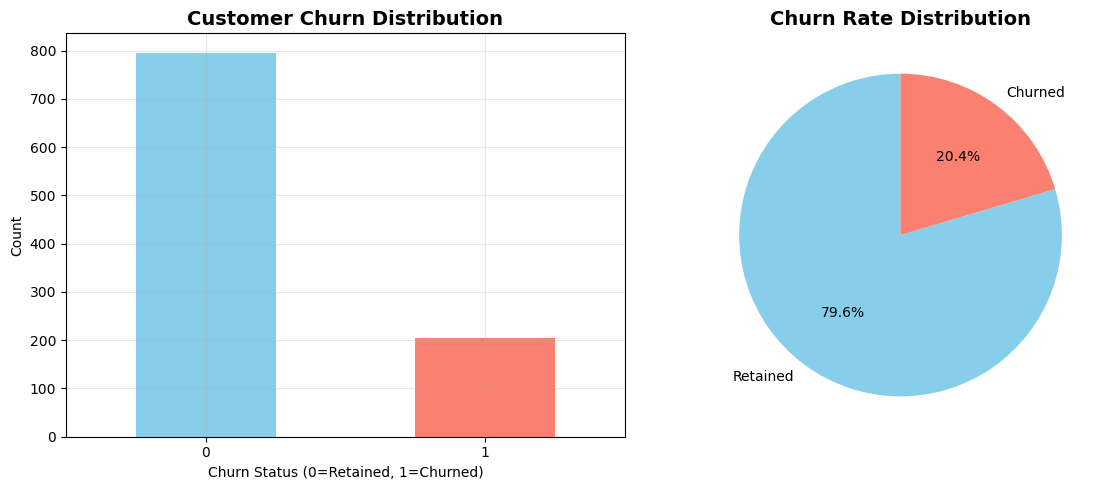

In [96]:
if churn_df is not None:

    # Churn rate overview
    churn_counts = churn_df['ChurnStatus'].value_counts()
    churn_rate = churn_counts[1] / churn_counts.sum() * 100

    print(f"Overall Churn Statistics:")
    print(f"  • Total Customers: {len(churn_df):,}")
    print(f"  • Churned Customers: {churn_counts[1]:,}")
    print(f"  • Retained Customers: {churn_counts[0]:,}")
    print(f"  • Churn Rate: {churn_rate:.1f}%")

    # Visualise churn distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Bar chart
    colors = ['#87CEEB', '#FA8072']  # skyblue, salmon
    churn_counts.plot(kind='bar', ax=ax1, color=colors)
    ax1.set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Churn Status (0=Retained, 1=Churned)')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=0)

    # Pie chart
    ax2.pie(churn_counts.values, labels=['Retained', 'Churned'], 
        colors=colors, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Churn Rate Distribution', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

### Dataset relevance scoring

In [57]:
def score_dataset_relevance(available_datasets):
    """Score each dataset based on churn prediction relevance"""
            
    # Full scoring matrix
    all_scores = {
        'Churn_Status': {
            'Predictive_Power': 10,
            'Data_Completeness': 10,
            'Business_Actionability': 10,
            'Feature_Richness': 2,
            'Temporal_Relevance': 8
        },
        'Customer_Demographics': {
            'Predictive_Power': 8,
            'Data_Completeness': 10,
            'Business_Actionability': 9,
            'Feature_Richness': 6,
            'Temporal_Relevance': 7
        },
        'Transaction_History': {
            'Predictive_Power': 9,
            'Data_Completeness': 10,
            'Business_Actionability': 9,
            'Feature_Richness': 8,
            'Temporal_Relevance': 9
        },
        'Customer_Service': {
            'Predictive_Power': 8,
            'Data_Completeness': 9,
            'Business_Actionability': 9,
            'Feature_Richness': 6,
            'Temporal_Relevance': 8
        },
        'Online_Activity': {
            'Predictive_Power': 7,
            'Data_Completeness': 10,
            'Business_Actionability': 8,
            'Feature_Richness': 5,
            'Temporal_Relevance': 9
        }
     }
    # Filter to only available datasets
    scores = {name: all_scores[name] for name in available_datasets.keys() if name in all_scores}
            
    # Calculate overall scores
    relevance_df = pd.DataFrame(scores).T
    relevance_df['Overall_Score'] = relevance_df.mean(axis=1)
    relevance_df['Rank'] = relevance_df['Overall_Score'].rank(ascending=False)
            
    return relevance_df.sort_values('Overall_Score', ascending=False)

relevance_scores = score_dataset_relevance(available_datasets)
print("Dataset Relevance Scores (Scale: 1-10)")
print(relevance_scores.round(1))

Dataset Relevance Scores (Scale: 1-10)
                       Predictive_Power  Data_Completeness  \
Transaction_History                   9                 10   
Customer_Demographics                 8                 10   
Customer_Service                      8                  9   
Churn_Status                         10                 10   
Online_Activity                       7                 10   

                       Business_Actionability  Feature_Richness  \
Transaction_History                         9                 8   
Customer_Demographics                       9                 6   
Customer_Service                            9                 6   
Churn_Status                               10                 2   
Online_Activity                             8                 5   

                       Temporal_Relevance  Overall_Score  Rank  
Transaction_History                     9            9.0   1.0  
Customer_Demographics                   7            8.

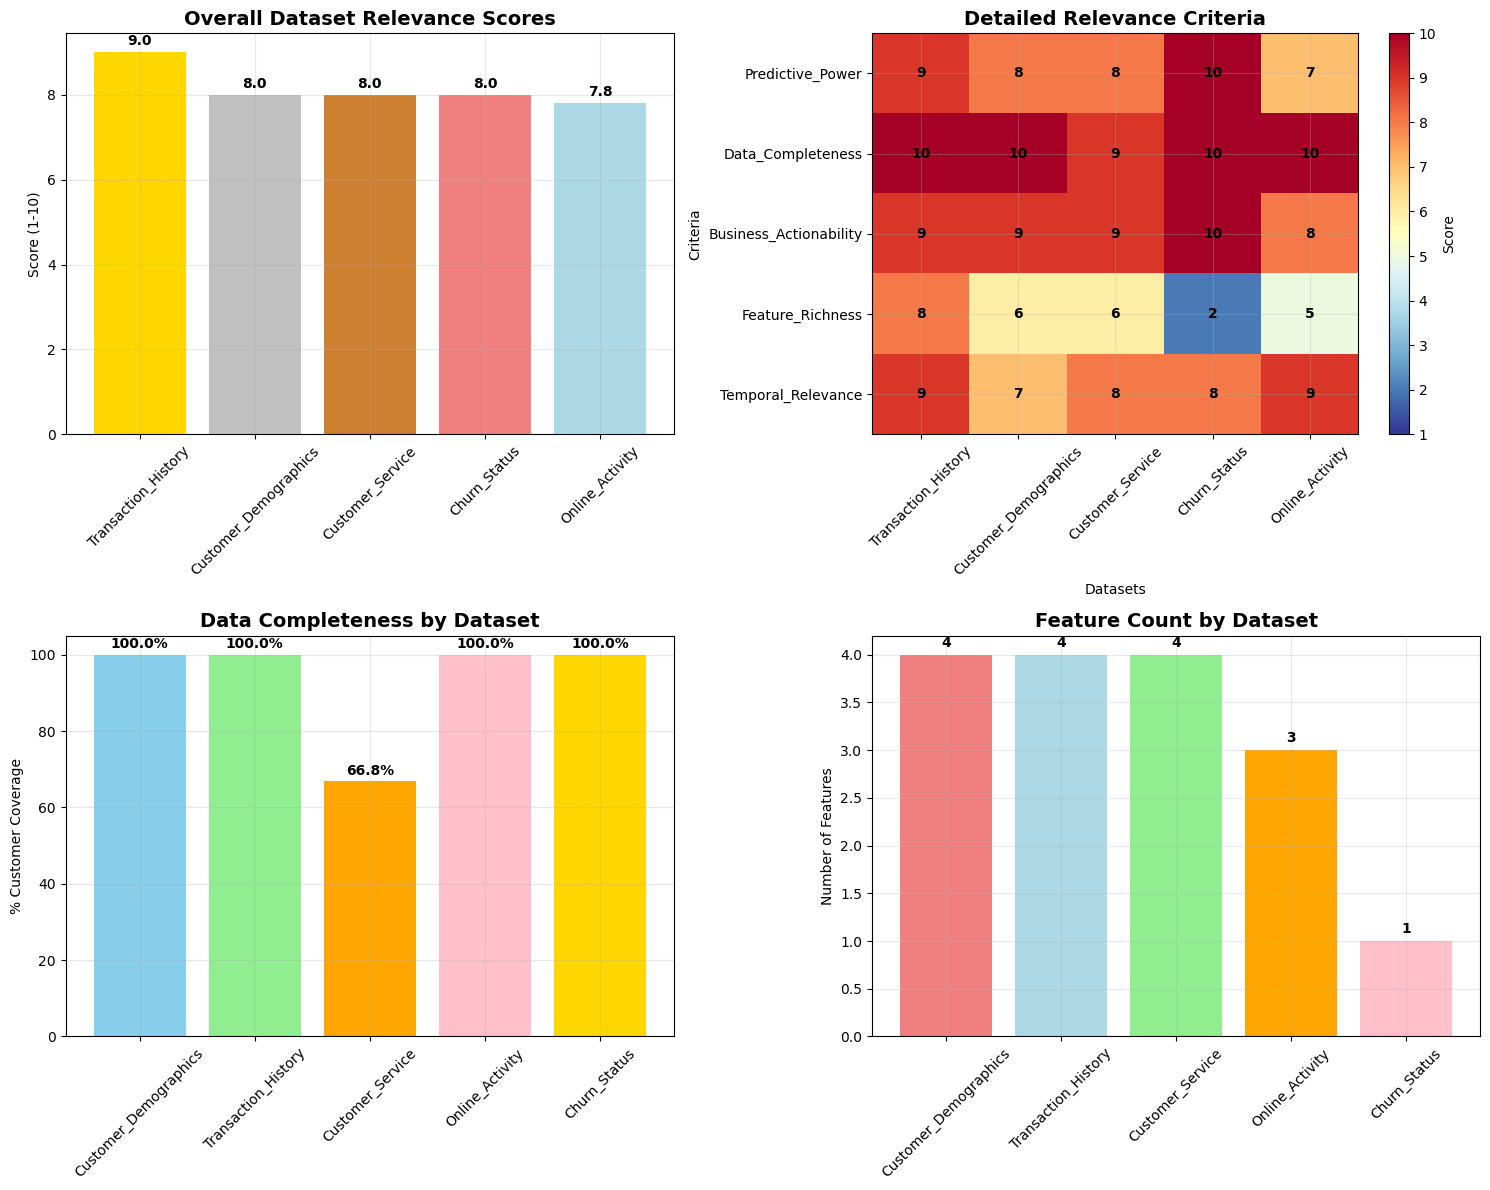

In [97]:
# Visualise relevance scores
if len(available_datasets) > 1:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Overall scores
    colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#F08080', '#ADD8E6'][:len(relevance_scores)]
    bars = ax1.bar(relevance_scores.index, relevance_scores['Overall_Score'], color=colors)
    ax1.set_title('Overall Dataset Relevance Scores', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Score (1-10)')
    ax1.tick_params(axis='x', rotation=45)
    for bar, score in zip(bars, relevance_scores['Overall_Score']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
            f'{score:.1f}', ha='center', va='bottom', fontweight='bold')

    # Detailed criteria heatmap
    criteria_data = relevance_scores.drop(['Overall_Score', 'Rank'], axis=1)
    im = ax2.imshow(criteria_data.T, cmap='RdYlBu_r', aspect='auto', vmin=1, vmax=10)
    cbar = plt.colorbar(im, ax=ax2, label='Score')

    # Add annotations to heatmap
    for i in range(len(criteria_data.columns)):
        for j in range(len(criteria_data.index)):
            ax2.text(j, i, f'{criteria_data.iloc[j, i]:.0f}', 
                    ha='center', va='center', color='black', fontweight='bold')

    ax2.set_title('Detailed Relevance Criteria', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Datasets')
    ax2.set_ylabel('Criteria')
    ax2.set_xticks(range(len(criteria_data.index)))
    ax2.set_xticklabels(criteria_data.index, rotation=45)
    ax2.set_yticks(range(len(criteria_data.columns)))
    ax2.set_yticklabels(criteria_data.columns)

    # Data completeness
    completeness_data = {}
    for name, df in available_datasets.items():
        if name == 'Customer_Service':
            # Estimate based on unique customers if we have the data
            if churn_df is not None:
                unique_customers = df['CustomerID'].nunique()
                total_customers = len(churn_df)
                completeness_data[name] = (unique_customers / total_customers) * 100
            else:
                completeness_data[name] = 100  # Assume complete if we can't calculate
        else:
            completeness_data[name] = 100

    bars3 = ax3.bar(completeness_data.keys(), completeness_data.values(), 
                    color=['#87CEEB', '#90EE90', '#FFA500', '#FFC0CB', '#FFD700'][:len(completeness_data)])
    ax3.set_title('Data Completeness by Dataset', fontsize=14, fontweight='bold')
    ax3.set_ylabel('% Customer Coverage')
    ax3.tick_params(axis='x', rotation=45)
    ax3.set_ylim(0, 105)
    for bar, value in zip(bars3, completeness_data.values()):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                    f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    # Feature richness
    feature_counts = {name: len(df.columns)-1 for name, df in available_datasets.items()}  # -1 for CustomerID
    bars4 = ax4.bar(feature_counts.keys(), feature_counts.values(),
                    color=['#F08080', '#ADD8E6', '#90EE90', '#FFA500', '#FFC0CB'][:len(feature_counts)])
    ax4.set_title('Feature Count by Dataset', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Number of Features')
    ax4.tick_params(axis='x', rotation=45)
    for bar, value in zip(bars4, feature_counts.values()):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                    f'{value}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

### Feature Engineering

In [62]:
if demographics_df is not None:
    
    def create_integrated_dataset():
        """Engineered Features"""
        
        # Start with demographics and churn status
        master_df = demographics_df.merge(churn_df, on='CustomerID', how='left')
        
        print(f"Base dataset: {len(master_df)} customers")
        
        # transaction features
        
        # Convert TransactionDate to datetime 
        transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
        
        # Aggregate transaction data
        trans_features = transactions_df.groupby('CustomerID').agg({
            'AmountSpent': ['sum', 'mean', 'count', 'std'],
            'TransactionDate': ['min', 'max'],
            'ProductCategory': 'nunique'
        }).round(2)
        
        # Flatten column names
        trans_features.columns = [
            'Total_Spent', 'Avg_Transaction', 'Transaction_Count', 'Spending_Volatility',
            'First_Transaction', 'Last_Transaction', 'Product_Categories'
        ]
        
        # Convert date columns to datetime 
        trans_features['First_Transaction'] = pd.to_datetime(trans_features['First_Transaction'])
        trans_features['Last_Transaction'] = pd.to_datetime(trans_features['Last_Transaction'])
        
        # Calculate additional transaction metrics
        current_date = transactions_df['TransactionDate'].max()
        trans_features['Days_Since_Last_Transaction'] = (current_date - trans_features['Last_Transaction']).dt.days
        trans_features['Customer_Tenure_Days'] = (trans_features['Last_Transaction'] - trans_features['First_Transaction']).dt.days
        trans_features['Transaction_Frequency'] = trans_features['Transaction_Count'] / (trans_features['Customer_Tenure_Days'] + 1) * 30  # Monthly frequency
        
        # Fill NaN values
        trans_features['Spending_Volatility'] = trans_features['Spending_Volatility'].fillna(0)
        trans_features['Customer_Tenure_Days'] = trans_features['Customer_Tenure_Days'].fillna(0)
        trans_features['Transaction_Frequency'] = trans_features['Transaction_Frequency'].fillna(0)
        
        # Service features
        
        # Convert InteractionDate to datetime 
        service_df['InteractionDate'] = pd.to_datetime(service_df['InteractionDate'])
        
        service_features = service_df.groupby('CustomerID').agg({
            'InteractionID': 'count',
            'InteractionDate': ['min', 'max'],
            'ResolutionStatus': lambda x: (x == 'Resolved').sum() / len(x)
        }).round(2)
        
        service_features.columns = ['Service_Interactions', 'First_Service_Date', 'Last_Service_Date', 'Resolution_Rate']
        
        # Convert date columns to datetime
        service_features['First_Service_Date'] = pd.to_datetime(service_features['First_Service_Date'])
        service_features['Last_Service_Date'] = pd.to_datetime(service_features['Last_Service_Date'])
        
        service_features['Days_Since_Last_Service'] = (current_date - service_features['Last_Service_Date']).dt.days
        
        # Online activity Features
        
        online_features = online_activity_df.copy()
        
        # Convert LastLoginDate to datetime 
        online_features['LastLoginDate'] = pd.to_datetime(online_features['LastLoginDate'])
        
        online_features['Days_Since_Last_Login'] = (current_date - online_features['LastLoginDate']).dt.days
        online_features = online_features.set_index('CustomerID')[['LoginFrequency', 'Days_Since_Last_Login', 'ServiceUsage']]
        
        # Merging all features
        
        # Merge transaction features
        master_df = master_df.merge(trans_features.reset_index(), on='CustomerID', how='left')
        
        # Merge service features
        master_df = master_df.merge(service_features.reset_index(), on='CustomerID', how='left')
        
        # Merge online features
        master_df = master_df.merge(online_features.reset_index(), on='CustomerID', how='left')
        
        # Fill missing values for customers without service interactions
        service_cols = ['Service_Interactions', 'Resolution_Rate', 'Days_Since_Last_Service']
        master_df[service_cols] = master_df[service_cols].fillna(0)
        
        print(f"Integrated dataset created: {master_df.shape[0]} rows × {master_df.shape[1]} columns")
        
        return master_df
    
    # Create integrated dataset
    master_df = create_integrated_dataset()
    
    # Display dataset overview
    print(f"\nIntergrated Dataset Overview:")
    print(f"Shape: {master_df.shape}")
    print(f"Columns: {list(master_df.columns)}")
    print(f"Churn Rate: {master_df['ChurnStatus'].mean()*100:.1f}%")

Base dataset: 1000 customers
Integrated dataset created: 1000 rows × 24 columns

Intergrated Dataset Overview:
Shape: (1000, 24)
Columns: ['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel', 'ChurnStatus', 'Total_Spent', 'Avg_Transaction', 'Transaction_Count', 'Spending_Volatility', 'First_Transaction', 'Last_Transaction', 'Product_Categories', 'Days_Since_Last_Transaction', 'Customer_Tenure_Days', 'Transaction_Frequency', 'Service_Interactions', 'First_Service_Date', 'Last_Service_Date', 'Resolution_Rate', 'Days_Since_Last_Service', 'LoginFrequency', 'Days_Since_Last_Login', 'ServiceUsage']
Churn Rate: 20.4%


### Demographic Analysis

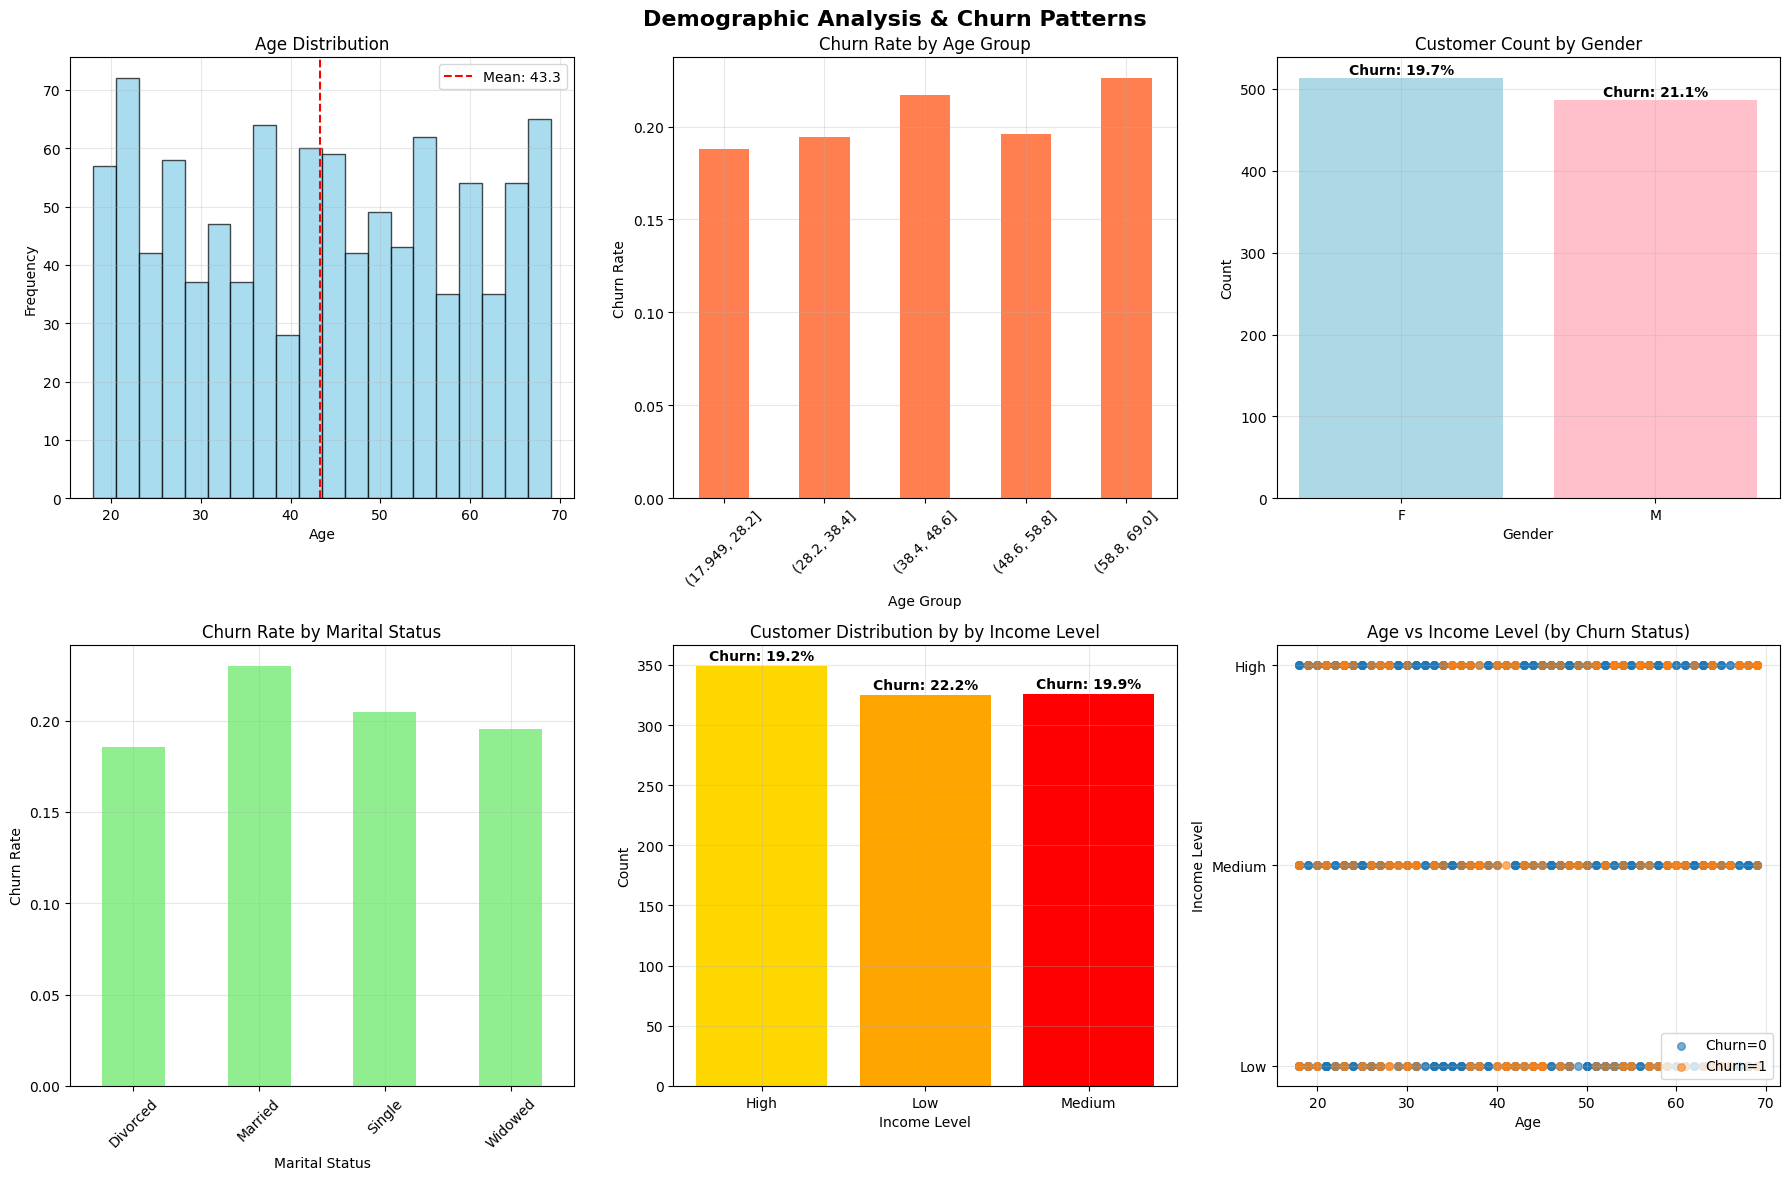

Demographic Statistics:

Age Analysis:
  • Mean Age: 43.3 years
  • Age Range: 18-69 years
  • Standard Deviation: 15.2

Churn by Demographics:

  Gender:
    • F: 19.7%
    • M: 21.1%

  MaritalStatus:
    • Divorced: 18.5%
    • Married: 23.0%
    • Single: 20.5%
    • Widowed: 19.6%

  IncomeLevel:
    • High: 19.2%
    • Low: 22.2%
    • Medium: 19.9%


In [64]:
def analyse_demographics():
    """Demographic analysis with churn patterns"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Demographic Analysis & Churn Patterns', fontsize=16, fontweight='bold')
    
    # Age Distribution and Churn
    ax1 = axes[0, 0]
    master_df['Age'].hist(bins=20, alpha=0.7, ax=ax1, color='skyblue', edgecolor='black')
    ax1.set_title('Age Distribution')
    ax1.set_xlabel('Age')
    ax1.set_ylabel('Frequency')
    ax1.axvline(master_df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {master_df["Age"].mean():.1f}')
    ax1.legend()
    
    # Age vs Churn Rate
    ax2 = axes[0, 1]
    age_bins = pd.cut(master_df['Age'], bins=5)
    churn_by_age = master_df.groupby(age_bins)['ChurnStatus'].agg(['mean', 'count'])
    churn_by_age['mean'].plot(kind='bar', ax=ax2, color='coral')
    ax2.set_title('Churn Rate by Age Group')
    ax2.set_xlabel('Age Group')
    ax2.set_ylabel('Churn Rate')
    ax2.tick_params(axis='x', rotation=45)
    
    # Gender Distribution
    ax3 = axes[0, 2]
    gender_churn = master_df.groupby('Gender')['ChurnStatus'].agg(['count', 'mean'])
    x_pos = np.arange(len(gender_churn.index))
    bars = ax3.bar(x_pos, gender_churn['count'], color=['lightblue', 'pink'])
    ax3.set_title('Customer Count by Gender')
    ax3.set_xlabel('Gender')
    ax3.set_ylabel('Count')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(gender_churn.index)
    
    # Add churn rate labels
    for i, (count, churn_rate) in enumerate(zip(gender_churn['count'], gender_churn['mean'])):
        ax3.text(i, count + 5, f'Churn: {churn_rate:.1%}', ha='center', fontweight='bold')
    
    # Marital Status vs Churn
    ax4 = axes[1, 0]
    marital_churn = master_df.groupby('MaritalStatus')['ChurnStatus'].mean()
    marital_churn.plot(kind='bar', ax=ax4, color='lightgreen')
    ax4.set_title('Churn Rate by Marital Status')
    ax4.set_xlabel('Marital Status')
    ax4.set_ylabel('Churn Rate')
    ax4.tick_params(axis='x', rotation=45)
    
    # Income Level Analysis
    ax5 = axes[1, 1]
    income_churn = master_df.groupby('IncomeLevel')['ChurnStatus'].agg(['count', 'mean'])
    x_pos = np.arange(len(income_churn.index))
    bars = ax5.bar(x_pos, income_churn['count'], color=['gold', 'orange', 'red'])
    ax5.set_title('Customer Distribution by by Income Level')
    ax5.set_xlabel('Income Level')
    ax5.set_ylabel('Count')
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(income_churn.index)
    
    # Add churn rate labels
    for i, (count, churn_rate) in enumerate(zip(income_churn['count'], income_churn['mean'])):
        ax5.text(i, count + 5, f'Churn: {churn_rate:.1%}', ha='center', fontweight='bold')
    
    # Age vs Income Scatter Plot
    ax6 = axes[1, 2]
    for churn_status in [0, 1]:
        subset = master_df[master_df['ChurnStatus'] == churn_status]
        income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
        subset_mapped = subset.copy()
        subset_mapped['IncomeLevel_Numeric'] = subset_mapped['IncomeLevel'].map(income_mapping)
        
        ax6.scatter(subset_mapped['Age'], subset_mapped['IncomeLevel_Numeric'], 
                    alpha=0.6, label=f'Churn={churn_status}', s=30)

    ax6.set_title('Age vs Income Level (by Churn Status)')
    ax6.set_xlabel('Age')
    ax6.set_ylabel('Income Level')
    ax6.set_yticks([1, 2, 3])
    ax6.set_yticklabels(['Low', 'Medium', 'High'])
    ax6.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Statistical Summary
    print("Demographic Statistics:")
    print("\nAge Analysis:")
    print(f"  • Mean Age: {master_df['Age'].mean():.1f} years")
    print(f"  • Age Range: {master_df['Age'].min()}-{master_df['Age'].max()} years")
    print(f"  • Standard Deviation: {master_df['Age'].std():.1f}")

    print("\nChurn by Demographics:")
    for col in ['Gender', 'MaritalStatus', 'IncomeLevel']:
        churn_rates = master_df.groupby(col)['ChurnStatus'].mean()
        print(f"\n  {col}:")
        for category, rate in churn_rates.items():
            print(f"    • {category}: {rate:.1%}")

# Call the function
analyse_demographics()

### Transaction Behavior Analysis

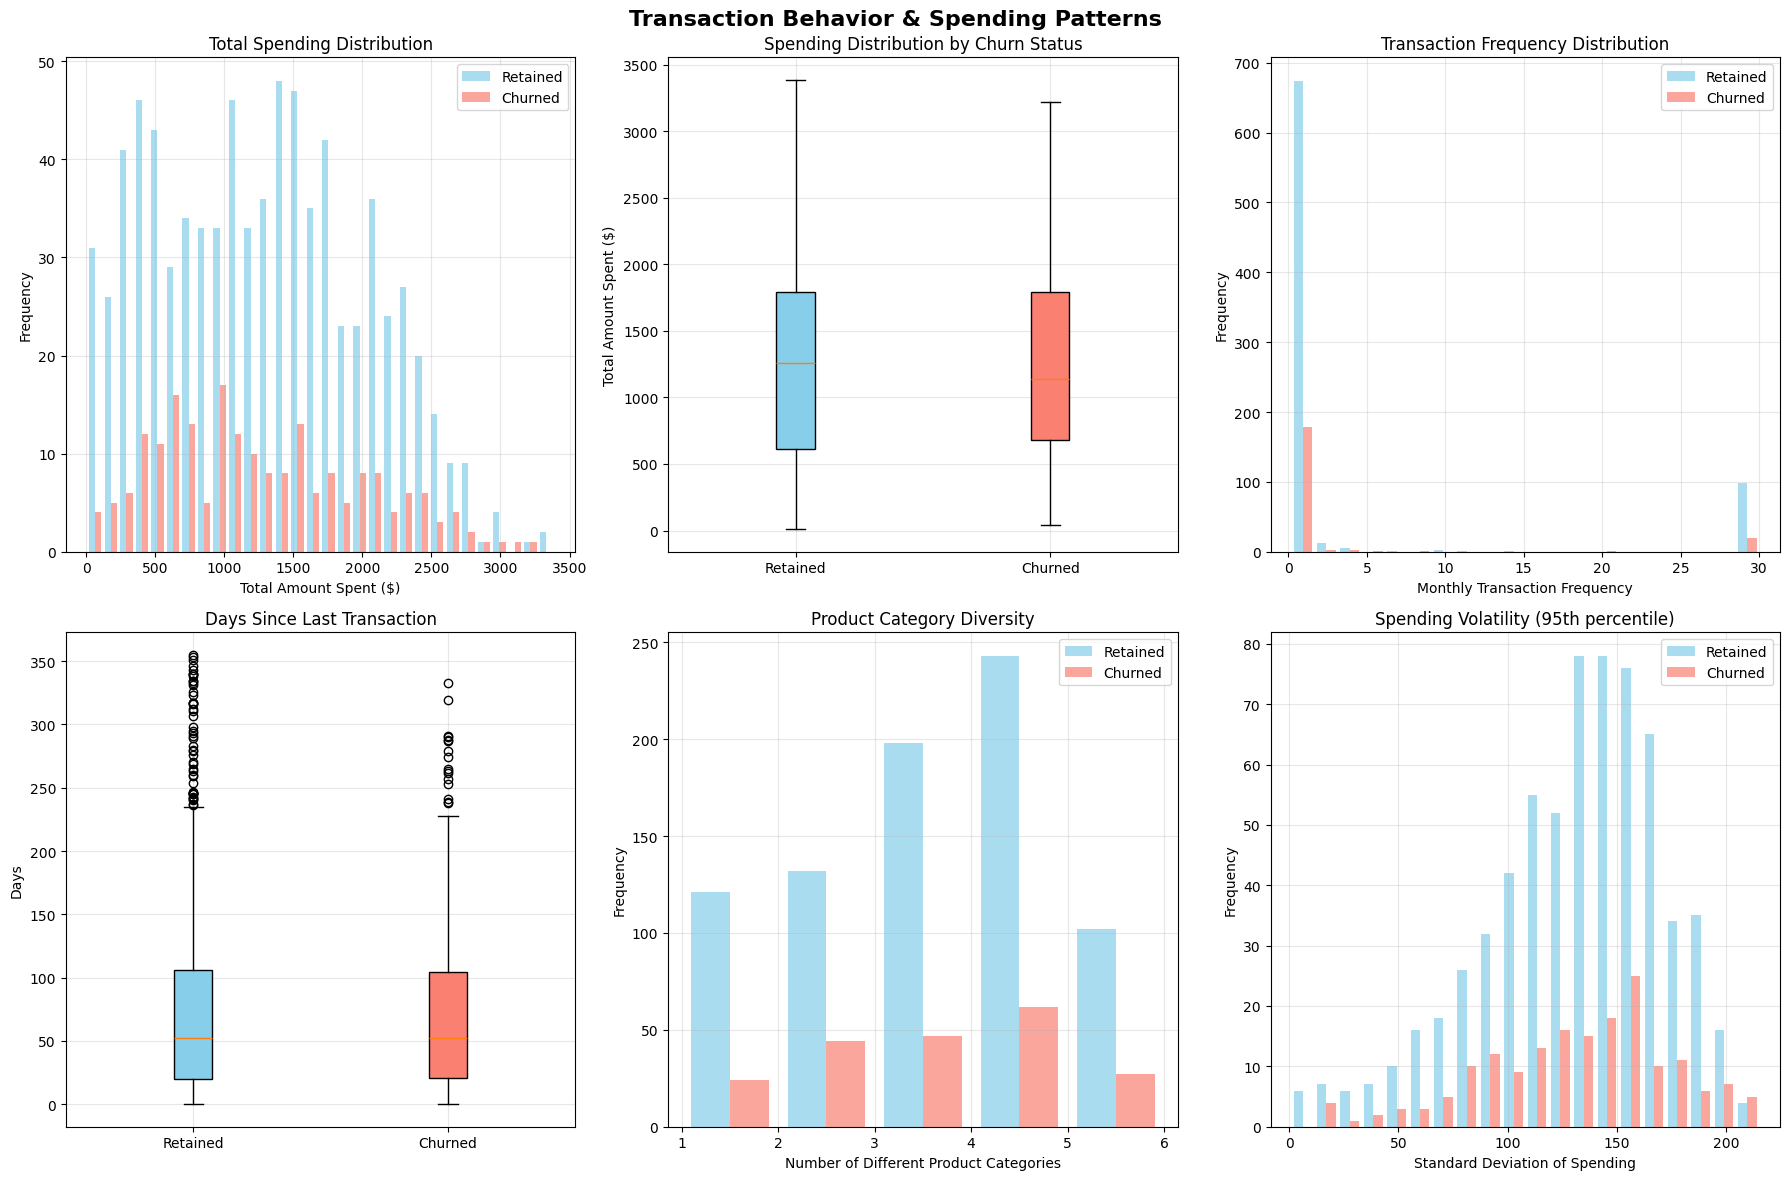


Transaction Statistics:

Total_Spent:
  Retained - Mean: 1266.58, Median: 1255.36
  Churned  - Mean: 1269.01, Median: 1135.37
  Difference: 2.43

Avg_Transaction:
  Retained - Mean: 247.01, Median: 248.28
  Churned  - Mean: 255.83, Median: 252.71
  Difference: 8.82

Transaction_Count:
  Retained - Mean: 5.07, Median: 5.00
  Churned  - Mean: 5.01, Median: 5.00
  Difference: -0.06

Transaction_Frequency:
  Retained - Mean: 4.45, Median: 0.77
  Churned  - Mean: 3.66, Median: 0.78
  Difference: -0.79

Days_Since_Last_Transaction:
  Retained - Mean: 77.92, Median: 52.00
  Churned  - Mean: 78.57, Median: 52.50
  Difference: 0.66

Product_Categories:
  Retained - Mean: 3.09, Median: 3.00
  Churned  - Mean: 3.12, Median: 3.00
  Difference: 0.03


In [98]:

 def analyze_transaction_behavior():
    """Analyze spending patterns and transaction behavior"""
        
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Transaction Behavior & Spending Patterns', fontsize=16, fontweight='bold')
        
    # Total Spent Distribution
    ax1 = axes[0, 0]
    churned = master_df[master_df['ChurnStatus'] == 1]['Total_Spent']
    retained = master_df[master_df['ChurnStatus'] == 0]['Total_Spent']
        
    ax1.hist([retained, churned], bins=30, alpha=0.7, label=['Retained', 'Churned'], 
            color=['skyblue', 'salmon'])
    ax1.set_title('Total Spending Distribution')
    ax1.set_xlabel('Total Amount Spent ($)')
    ax1.set_ylabel('Frequency')
    ax1.legend()
        
    # Box Plot: Spending by Churn Status
    ax2 = axes[0, 1]
    box_data = [retained, churned]
    bp = ax2.boxplot(box_data, labels=['Retained', 'Churned'], patch_artist=True)
    bp['boxes'][0].set_facecolor('skyblue')
    bp['boxes'][1].set_facecolor('salmon')
    ax2.set_title('Spending Distribution by Churn Status')
    ax2.set_ylabel('Total Amount Spent ($)')
        
    # Transaction Frequency Analysis
    ax3 = axes[0, 2]
    freq_churned = master_df[master_df['ChurnStatus'] == 1]['Transaction_Frequency']
    freq_retained = master_df[master_df['ChurnStatus'] == 0]['Transaction_Frequency']
        
    ax3.hist([freq_retained, freq_churned], bins=20, alpha=0.7, 
            label=['Retained', 'Churned'], color=['skyblue', 'salmon'])
    ax3.set_title('Transaction Frequency Distribution')
    ax3.set_xlabel('Monthly Transaction Frequency')
    ax3.set_ylabel('Frequency')
    ax3.legend()
        
    # Days Since Last Transaction
    ax4 = axes[1, 0]
    days_churned = master_df[master_df['ChurnStatus'] == 1]['Days_Since_Last_Transaction']
    days_retained = master_df[master_df['ChurnStatus'] == 0]['Days_Since_Last_Transaction']
        
    box_data_days = [days_retained, days_churned]
    bp2 = ax4.boxplot(box_data_days, labels=['Retained', 'Churned'], patch_artist=True)
    bp2['boxes'][0].set_facecolor('skyblue')
    bp2['boxes'][1].set_facecolor('salmon')
    ax4.set_title('Days Since Last Transaction')
    ax4.set_ylabel('Days')
        
    # Product Category Diversity
    ax5 = axes[1, 1]
    cat_churned = master_df[master_df['ChurnStatus'] == 1]['Product_Categories']
    cat_retained = master_df[master_df['ChurnStatus'] == 0]['Product_Categories']
        
    ax5.hist([cat_retained, cat_churned], bins=range(1, 7), alpha=0.7, 
            label=['Retained', 'Churned'], color=['skyblue', 'salmon'])
    ax5.set_title('Product Category Diversity')
    ax5.set_xlabel('Number of Different Product Categories')
    ax5.set_ylabel('Frequency')
    ax5.legend()
        
    # Spending Volatility
    ax6 = axes[1, 2]
    vol_churned = master_df[master_df['ChurnStatus'] == 1]['Spending_Volatility']
    vol_retained = master_df[master_df['ChurnStatus'] == 0]['Spending_Volatility']
        
    # Remove outliers for better visualization
    vol_churned_clean = vol_churned[vol_churned <= vol_churned.quantile(0.95)]
    vol_retained_clean = vol_retained[vol_retained <= vol_retained.quantile(0.95)]
        
    ax6.hist([vol_retained_clean, vol_churned_clean], bins=20, alpha=0.7, 
            label=['Retained', 'Churned'], color=['skyblue', 'salmon'])
    ax6.set_title('Spending Volatility (95th percentile)')
    ax6.set_xlabel('Standard Deviation of Spending')
    ax6.set_ylabel('Frequency')
    ax6.legend()
        
    plt.tight_layout()
    plt.show()
        
    # Statistical Analysis
    print("\nTransaction Statistics:")
        
    numeric_cols = ['Total_Spent', 'Avg_Transaction', 'Transaction_Count', 
                    'Transaction_Frequency', 'Days_Since_Last_Transaction', 'Product_Categories']
        
    for col in numeric_cols:
        print(f"\n{col}:")
        retained_stats = master_df[master_df['ChurnStatus'] == 0][col].describe()
        churned_stats = master_df[master_df['ChurnStatus'] == 1][col].describe()
            
        print(f"  Retained - Mean: {retained_stats['mean']:.2f}, Median: {retained_stats['50%']:.2f}")
        print(f"  Churned  - Mean: {churned_stats['mean']:.2f}, Median: {churned_stats['50%']:.2f}")
        print(f"  Difference: {churned_stats['mean'] - retained_stats['mean']:.2f}")
    
analyze_transaction_behavior()

### Service Interaction Analysis

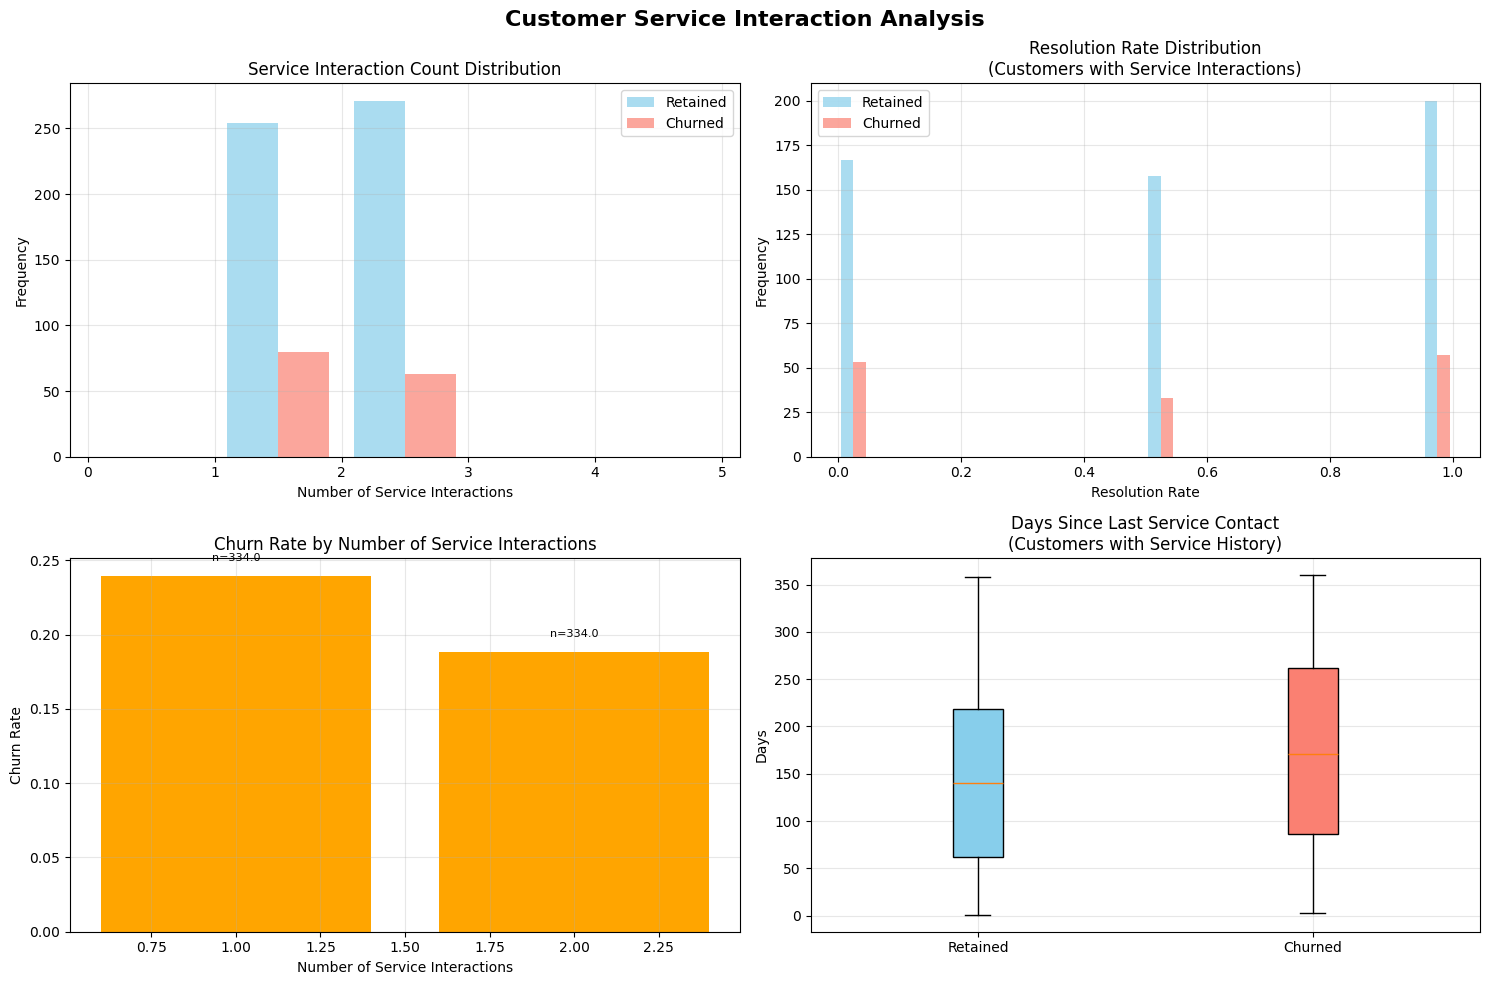


Service Interaction Statistics:
  • Customers with service interactions: 668/1000 (66.8%)
  • Average interactions per customer (with service): 1.5
  • Average resolution rate: 52.8%

Churn rates by service interaction level:
  • 1 interactions: 24.0% (n=334)
  • 2 interactions: 18.9% (n=334)


In [99]:
def analyze_service_interactions():
    """Analyse customer service patterns and resolution rates"""
        
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Customer Service Interaction Analysis', fontsize=16, fontweight='bold')
        
    # Service Interaction Count
    ax1 = axes[0, 0]
    service_churned = master_df[master_df['ChurnStatus'] == 1]['Service_Interactions']
    service_retained = master_df[master_df['ChurnStatus'] == 0]['Service_Interactions']
        
    ax1.hist([service_retained, service_churned], bins=range(0, 6), alpha=0.7, 
            label=['Retained', 'Churned'], color=['skyblue', 'salmon'])
    ax1.set_title('Service Interaction Count Distribution')
    ax1.set_xlabel('Number of Service Interactions')
    ax1.set_ylabel('Frequency')
    ax1.legend()
        
    # Resolution Rate Analysis
    ax2 = axes[0, 1]
    # Only for customers who had service interactions
    service_customers = master_df[master_df['Service_Interactions'] > 0]
    res_churned = service_customers[service_customers['ChurnStatus'] == 1]['Resolution_Rate']
    res_retained = service_customers[service_customers['ChurnStatus'] == 0]['Resolution_Rate']
        
    ax2.hist([res_retained, res_churned], bins=20, alpha=0.7, 
            label=['Retained', 'Churned'], color=['skyblue', 'salmon'])
    ax2.set_title('Resolution Rate Distribution\n(Customers with Service Interactions)')
    ax2.set_xlabel('Resolution Rate')
    ax2.set_ylabel('Frequency')
    ax2.legend()
        
    # Service Interactions vs Churn Rate
    ax3 = axes[1, 0]
    service_churn = master_df.groupby('Service_Interactions')['ChurnStatus'].agg(['mean', 'count'])
    service_churn = service_churn[service_churn['count'] >= 10]  # Filter for statistical significance
        
    bars = ax3.bar(service_churn.index, service_churn['mean'], color='orange')
    ax3.set_title('Churn Rate by Number of Service Interactions')
    ax3.set_xlabel('Number of Service Interactions')
    ax3.set_ylabel('Churn Rate')
        
    # Add count labels on bars
    for i, (interactions, row) in enumerate(service_churn.iterrows()):
        ax3.text(interactions, row['mean'] + 0.01, f"n={row['count']}", 
                ha='center', fontsize=8)
        
    # Days Since Last Service
    ax4 = axes[1, 1]
    service_customers_with_days = service_customers[service_customers['Days_Since_Last_Service'] < 1000]  # Remove outliers
    days_churned = service_customers_with_days[service_customers_with_days['ChurnStatus'] == 1]['Days_Since_Last_Service']
    days_retained = service_customers_with_days[service_customers_with_days['ChurnStatus'] == 0]['Days_Since_Last_Service']
        
    box_data = [days_retained, days_churned]
    bp = ax4.boxplot(box_data, labels=['Retained', 'Churned'], patch_artist=True)
    bp['boxes'][0].set_facecolor('skyblue')
    bp['boxes'][1].set_facecolor('salmon')
    ax4.set_title('Days Since Last Service Contact\n(Customers with Service History)')
    ax4.set_ylabel('Days')
        
    plt.tight_layout()
    plt.show()
        
    # Service Statistics
    print("\nService Interaction Statistics:")
        
    total_customers = len(master_df)
    customers_with_service = (master_df['Service_Interactions'] > 0).sum()
        
    print(f"  • Customers with service interactions: {customers_with_service}/{total_customers} ({customers_with_service/total_customers:.1%})")
        
    service_stats = master_df[master_df['Service_Interactions'] > 0]
    print(f"  • Average interactions per customer (with service): {service_stats['Service_Interactions'].mean():.1f}")
    print(f"  • Average resolution rate: {service_stats['Resolution_Rate'].mean():.1%}")
        
    print(f"\nChurn rates by service interaction level:")
    for interactions in range(5):
        subset = master_df[master_df['Service_Interactions'] == interactions]
        if len(subset) > 0:
            churn_rate = subset['ChurnStatus'].mean()
            print(f"  • {interactions} interactions: {churn_rate:.1%} (n={len(subset)})")
    
analyze_service_interactions()

### Online Activity Analysis

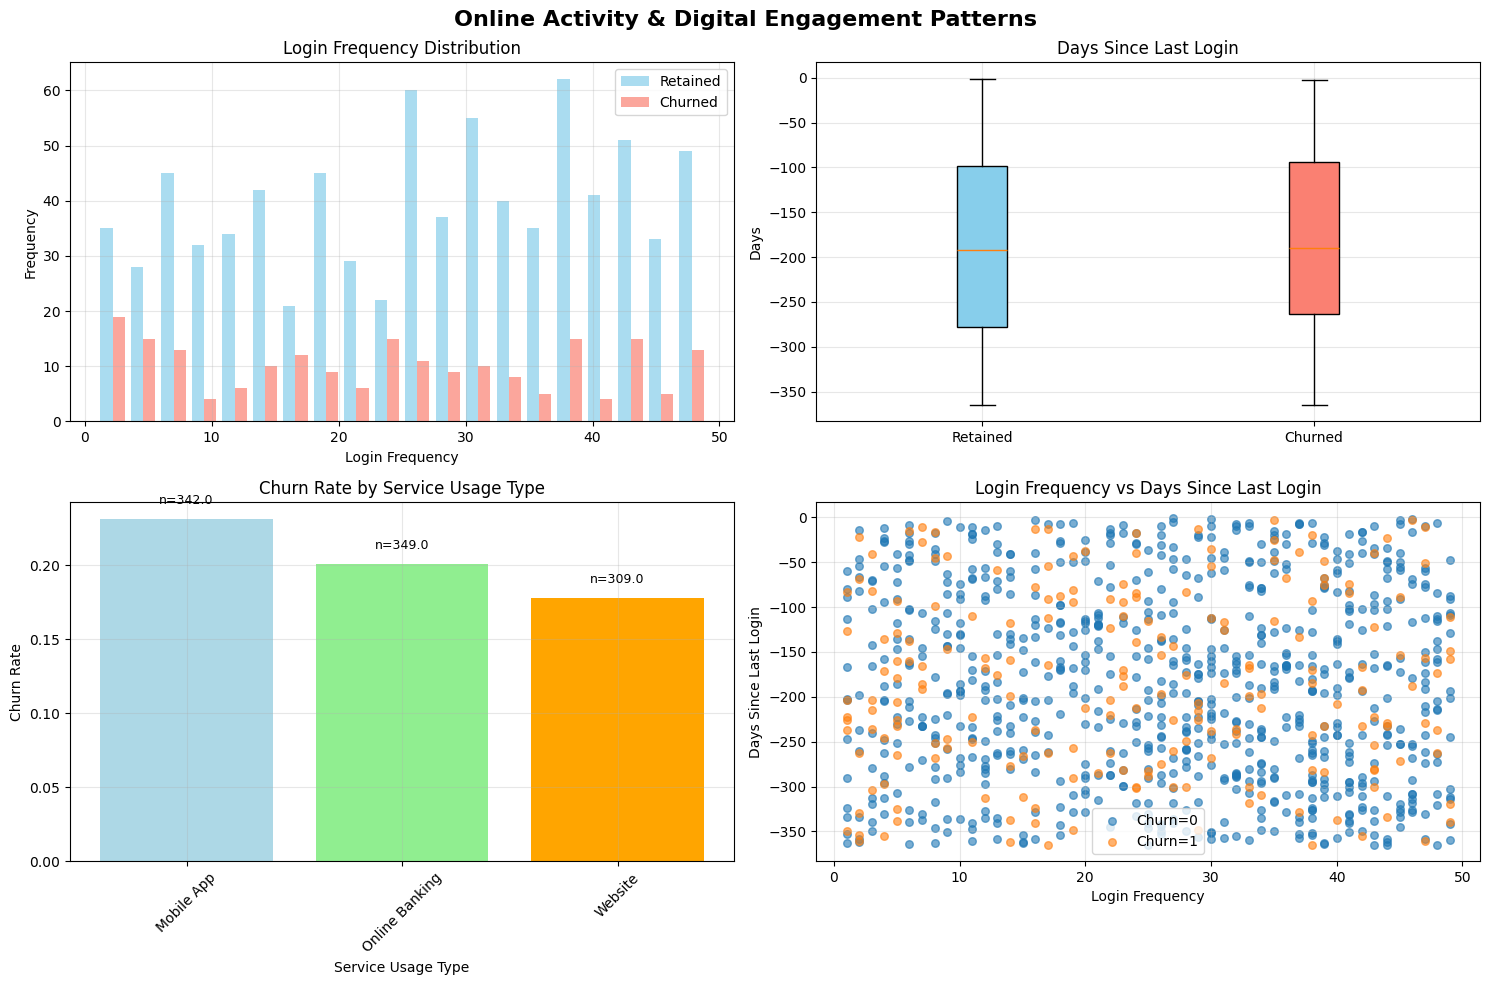


 Digital Engagement Statitsics:
Login Frequency:
  • Retained customers - Mean: 26.5, Median: 28.0
  • Churned customers - Mean: 23.6, Median: 24.0

Days Since Last Login:
  • Retained customers - Mean: -187.4, Median: -192.0
  • Churned customers - Mean: -185.0, Median: -189.5

Service Usage Preferences:
  • Mobile App: 23.1% churn rate (n=342)
  • Website: 17.8% churn rate (n=309)
  • Online Banking: 20.1% churn rate (n=349)


In [100]:
def analyze_online_activity():
    """Analyse digital engagement patterns"""
        
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Online Activity & Digital Engagement Patterns', fontsize=16, fontweight='bold')
        
    # Login Frequency Distribution
    ax1 = axes[0, 0]
    login_churned = master_df[master_df['ChurnStatus'] == 1]['LoginFrequency']
    login_retained = master_df[master_df['ChurnStatus'] == 0]['LoginFrequency']
        
    ax1.hist([login_retained, login_churned], bins=20, alpha=0.7, 
            label=['Retained', 'Churned'], color=['skyblue', 'salmon'])
    ax1.set_title('Login Frequency Distribution')
    ax1.set_xlabel('Login Frequency')
    ax1.set_ylabel('Frequency')
    ax1.legend()
        
    # Days Since Last Login
    ax2 = axes[0, 1]
    days_login_churned = master_df[master_df['ChurnStatus'] == 1]['Days_Since_Last_Login']
    days_login_retained = master_df[master_df['ChurnStatus'] == 0]['Days_Since_Last_Login']
        
    box_data = [days_login_retained, days_login_churned]
    bp = ax2.boxplot(box_data, labels=['Retained', 'Churned'], patch_artist=True)
    bp['boxes'][0].set_facecolor('skyblue')
    bp['boxes'][1].set_facecolor('salmon')
    ax2.set_title('Days Since Last Login')
    ax2.set_ylabel('Days')
        
    # Service Usage Distribution
    ax3 = axes[1, 0]
    service_usage_churn = master_df.groupby('ServiceUsage')['ChurnStatus'].agg(['mean', 'count'])
        
    bars = ax3.bar(service_usage_churn.index, service_usage_churn['mean'], 
                    color=['lightblue', 'lightgreen', 'orange'])
    ax3.set_title('Churn Rate by Service Usage Type')
    ax3.set_xlabel('Service Usage Type')
    ax3.set_ylabel('Churn Rate')
    ax3.tick_params(axis='x', rotation=45)
        
    # Add count labels
    for i, (usage_type, row) in enumerate(service_usage_churn.iterrows()):
        ax3.text(i, row['mean'] + 0.01, f"n={row['count']}", ha='center', fontsize=9)
        
    # Login Frequency vs Days Since Last Login Scatter
    ax4 = axes[1, 1]
    for churn_status in [0, 1]:
        subset = master_df[master_df['ChurnStatus'] == churn_status]
        ax4.scatter(subset['LoginFrequency'], subset['Days_Since_Last_Login'], 
                    alpha=0.6, label=f'Churn={churn_status}', s=30)
        
    ax4.set_title('Login Frequency vs Days Since Last Login')
    ax4.set_xlabel('Login Frequency')
    ax4.set_ylabel('Days Since Last Login')
    ax4.legend()
        
    plt.tight_layout()
    plt.show()
        
    # Digital Engagement Statistics
    print("\n Digital Engagement Statitsics:")
        
    print(f"Login Frequency:")
    print(f"  • Retained customers - Mean: {login_retained.mean():.1f}, Median: {login_retained.median():.1f}")
    print(f"  • Churned customers - Mean: {login_churned.mean():.1f}, Median: {login_churned.median():.1f}")
        
    print(f"\nDays Since Last Login:")
    print(f"  • Retained customers - Mean: {days_login_retained.mean():.1f}, Median: {days_login_retained.median():.1f}")
    print(f"  • Churned customers - Mean: {days_login_churned.mean():.1f}, Median: {days_login_churned.median():.1f}")
        
    print(f"\nService Usage Preferences:")
    for usage_type in master_df['ServiceUsage'].unique():
        subset = master_df[master_df['ServiceUsage'] == usage_type]
        churn_rate = subset['ChurnStatus'].mean()
        print(f"  • {usage_type}: {churn_rate:.1%} churn rate (n={len(subset)})")
    
analyze_online_activity()

### Correlation Analysis

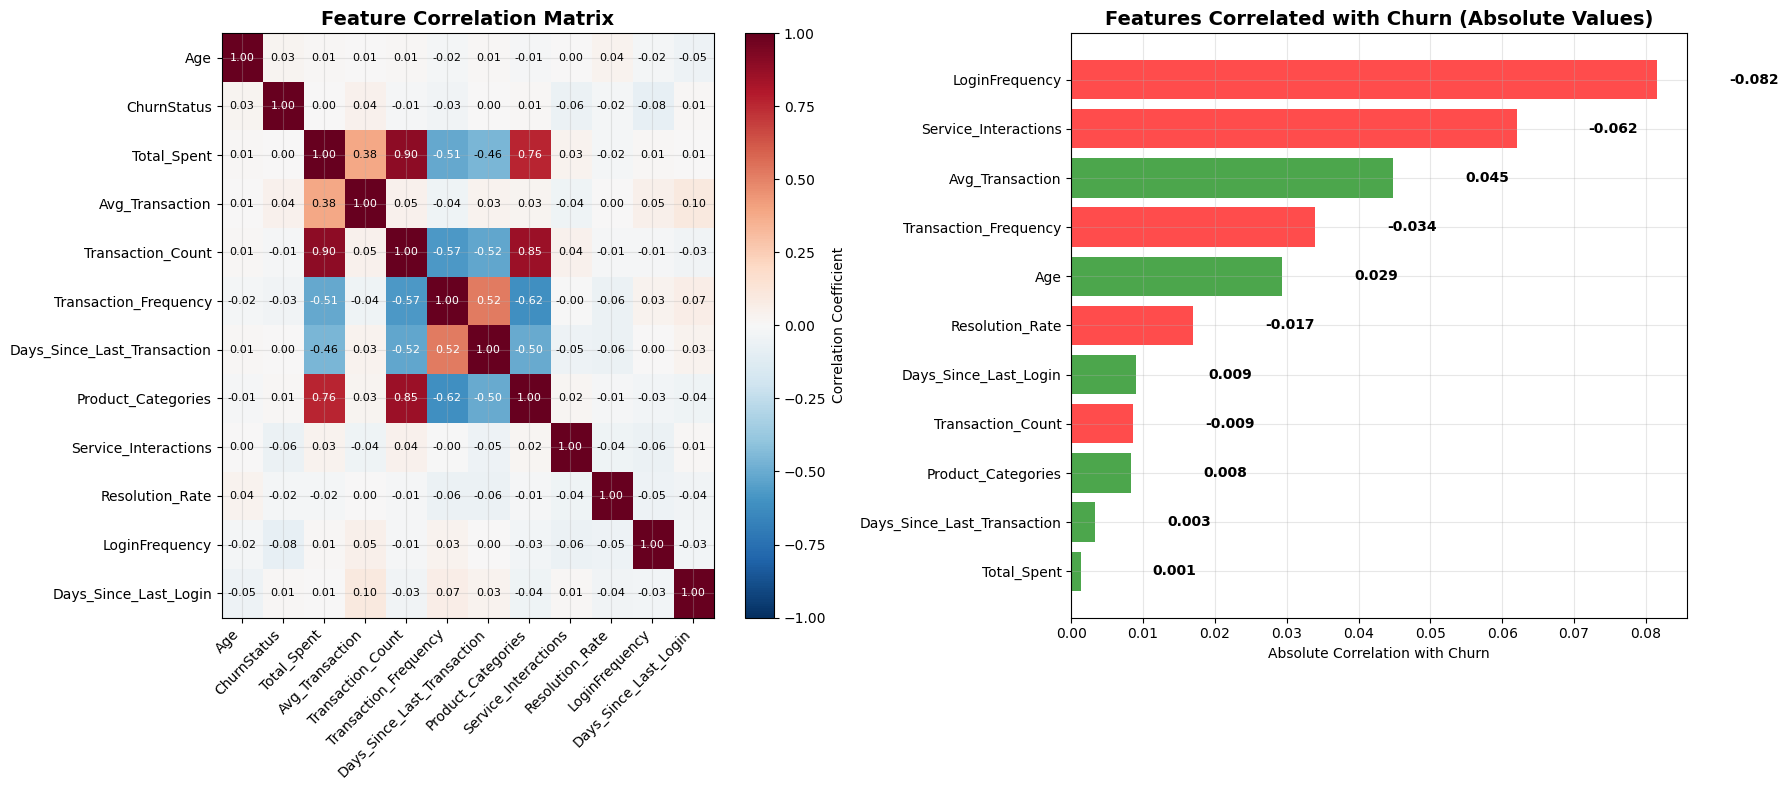


 Top correlation with churn:
  • LoginFrequency: -0.082 (↓ Lower values → more churn)
  • Service_Interactions: -0.062 (↓ Lower values → more churn)
  • Avg_Transaction: 0.045 (↑ Higher values → more churn)
  • Transaction_Frequency: -0.034 (↓ Lower values → more churn)
  • Age: 0.029 (↑ Higher values → more churn)
  • Resolution_Rate: -0.017 (↓ Lower values → more churn)
  • Days_Since_Last_Login: 0.009 (↑ Higher values → more churn)
  • Transaction_Count: -0.009 (↓ Lower values → more churn)
  • Product_Categories: 0.008 (↑ Higher values → more churn)
  • Days_Since_Last_Transaction: 0.003 (↑ Higher values → more churn)


In [101]:
def correlation_analysis():
    """Analyse correlations between features and churn"""
        
    # Select numeric columns for correlation
    numeric_cols = ['Age', 'ChurnStatus', 'Total_Spent', 'Avg_Transaction', 
                    'Transaction_Count', 'Transaction_Frequency', 'Days_Since_Last_Transaction',
                    'Product_Categories', 'Service_Interactions', 'Resolution_Rate',
                    'LoginFrequency', 'Days_Since_Last_Login']
        
    corr_data = master_df[numeric_cols].corr()
        
    # Create correlation heatmap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
        
    # Full correlation matrix
    im1 = ax1.imshow(corr_data, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    ax1.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
    ax1.set_xticks(range(len(numeric_cols)))
    ax1.set_yticks(range(len(numeric_cols)))
    ax1.set_xticklabels(numeric_cols, rotation=45, ha='right')
    ax1.set_yticklabels(numeric_cols)
        
    # Add correlation values
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            ax1.text(j, i, f'{corr_data.iloc[i, j]:.2f}', 
                    ha='center', va='center', fontsize=8,
                    color='white' if abs(corr_data.iloc[i, j]) > 0.5 else 'black')
        
    plt.colorbar(im1, ax=ax1, label='Correlation Coefficient')
        
    # Churn correlation focus
    churn_corr = corr_data['ChurnStatus'].abs().sort_values(ascending=True)
    churn_corr = churn_corr[churn_corr.index != 'ChurnStatus']  # Remove self-correlation
        
    colors = ['red' if x < 0 else 'green' for x in corr_data['ChurnStatus'][churn_corr.index]]
    bars = ax2.barh(range(len(churn_corr)), churn_corr.values, color=colors, alpha=0.7)
    ax2.set_title('Features Correlated with Churn (Absolute Values)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Absolute Correlation with Churn')
    ax2.set_yticks(range(len(churn_corr)))
    ax2.set_yticklabels(churn_corr.index)
        
    # Add correlation values on bars
    for i, (feature, corr_val) in enumerate(zip(churn_corr.index, churn_corr.values)):
        actual_corr = corr_data['ChurnStatus'][feature]
        ax2.text(corr_val + 0.01, i, f'{actual_corr:.3f}', va='center', fontweight='bold')
        
    plt.tight_layout()
    plt.show()
        
    # Print top correlations with churn
    print("\n Top correlation with churn:")
    churn_corr_signed = corr_data['ChurnStatus'].drop('ChurnStatus').sort_values(key=abs, ascending=False)
        
    for feature, correlation in churn_corr_signed.head(10).items():
        direction = "↑ Higher" if correlation > 0 else "↓ Lower"
        print(f"  • {feature}: {correlation:.3f} ({direction} values → more churn)")
        
    return corr_data
    
correlation_matrix = correlation_analysis()

### Anomaly Detection

In [102]:
def detect_anomalies_and_patterns():
    """Identify unusual patterns and potential data quality issues"""
        
    print("\nAnomaly Detection:")
        
    # Check for extreme values (outliers)
    numeric_features = ['Age', 'Total_Spent', 'Transaction_Count', 'LoginFrequency', 
                        'Days_Since_Last_Transaction', 'Days_Since_Last_Login']
        
    outlier_summary = {}
        
    for feature in numeric_features:
        Q1 = master_df[feature].quantile(0.25)
        Q3 = master_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
            
        outliers = master_df[(master_df[feature] < lower_bound) | (master_df[feature] > upper_bound)]
        outlier_pct = len(outliers) / len(master_df) * 100
            
        outlier_summary[feature] = {
            'count': len(outliers),
            'percentage': outlier_pct,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
            
        print(f"\n{feature}:")
        print(f"  • Outliers: {len(outliers)} ({outlier_pct:.1f}%)")
        print(f"  • Normal range: {lower_bound:.1f} to {upper_bound:.1f}")
        if len(outliers) > 0:
            outlier_churn_rate = outliers['ChurnStatus'].mean()
            normal_churn_rate = master_df[~master_df.index.isin(outliers.index)]['ChurnStatus'].mean()
            print(f"  • Churn rate in outliers: {outlier_churn_rate:.1%}")
            print(f"  • Churn rate in normal range: {normal_churn_rate:.1%}")
        
    # Identify high-risk customer segments
    print(f"\nHigh-risk cutomer segements:")
        
    # Segment 1: High spenders with recent inactivity
    high_spenders_inactive = master_df[
        (master_df['Total_Spent'] > master_df['Total_Spent'].quantile(0.75)) &
        (master_df['Days_Since_Last_Transaction'] > master_df['Days_Since_Last_Transaction'].quantile(0.75))
    ]
    if len(high_spenders_inactive) > 0:
        print(f"  • High spenders with recent inactivity: {len(high_spenders_inactive)} customers")
        print(f"    Churn rate: {high_spenders_inactive['ChurnStatus'].mean():.1%}")
        
    # Segment 2: Frequent service interactions with low resolution
    frequent_service_low_resolution = master_df[
        (master_df['Service_Interactions'] >= 2) &
        (master_df['Resolution_Rate'] < 0.8)
    ]
    if len(frequent_service_low_resolution) > 0:
        print(f"  • Frequent service users with low resolution: {len(frequent_service_low_resolution)} customers")
        print(f"    Churn rate: {frequent_service_low_resolution['ChurnStatus'].mean():.1%}")
        
    # Segment 3: Low digital engagement
    low_digital_engagement = master_df[
        (master_df['LoginFrequency'] < master_df['LoginFrequency'].quantile(0.25)) &
        (master_df['Days_Since_Last_Login'] > master_df['Days_Since_Last_Login'].quantile(0.75))
    ]
    if len(low_digital_engagement) > 0:
        print(f"  • Low digital engagement: {len(low_digital_engagement)} customers")
        print(f"    Churn rate: {low_digital_engagement['ChurnStatus'].mean():.1%}")
        
    return outlier_summary
    
anomaly_results = detect_anomalies_and_patterns()


Anomaly Detection:

Age:
  • Outliers: 0 (0.0%)
  • Normal range: -9.0 to 95.0

Total_Spent:
  • Outliers: 0 (0.0%)
  • Normal range: -1121.1 to 3539.7

Transaction_Count:
  • Outliers: 0 (0.0%)
  • Normal range: -3.0 to 13.0

LoginFrequency:
  • Outliers: 0 (0.0%)
  • Normal range: -22.6 to 74.4

Days_Since_Last_Transaction:
  • Outliers: 66 (6.6%)
  • Normal range: -109.0 to 235.0
  • Churn rate in outliers: 24.2%
  • Churn rate in normal range: 20.1%

Days_Since_Last_Login:
  • Outliers: 0 (0.0%)
  • Normal range: -538.6 to 166.4

High-risk cutomer segements:
  • High spenders with recent inactivity: 18 customers
    Churn rate: 16.7%
  • Frequent service users with low resolution: 259 customers
    Churn rate: 17.8%
  • Low digital engagement: 69 customers
    Churn rate: 18.8%


### Advanced Visualizations

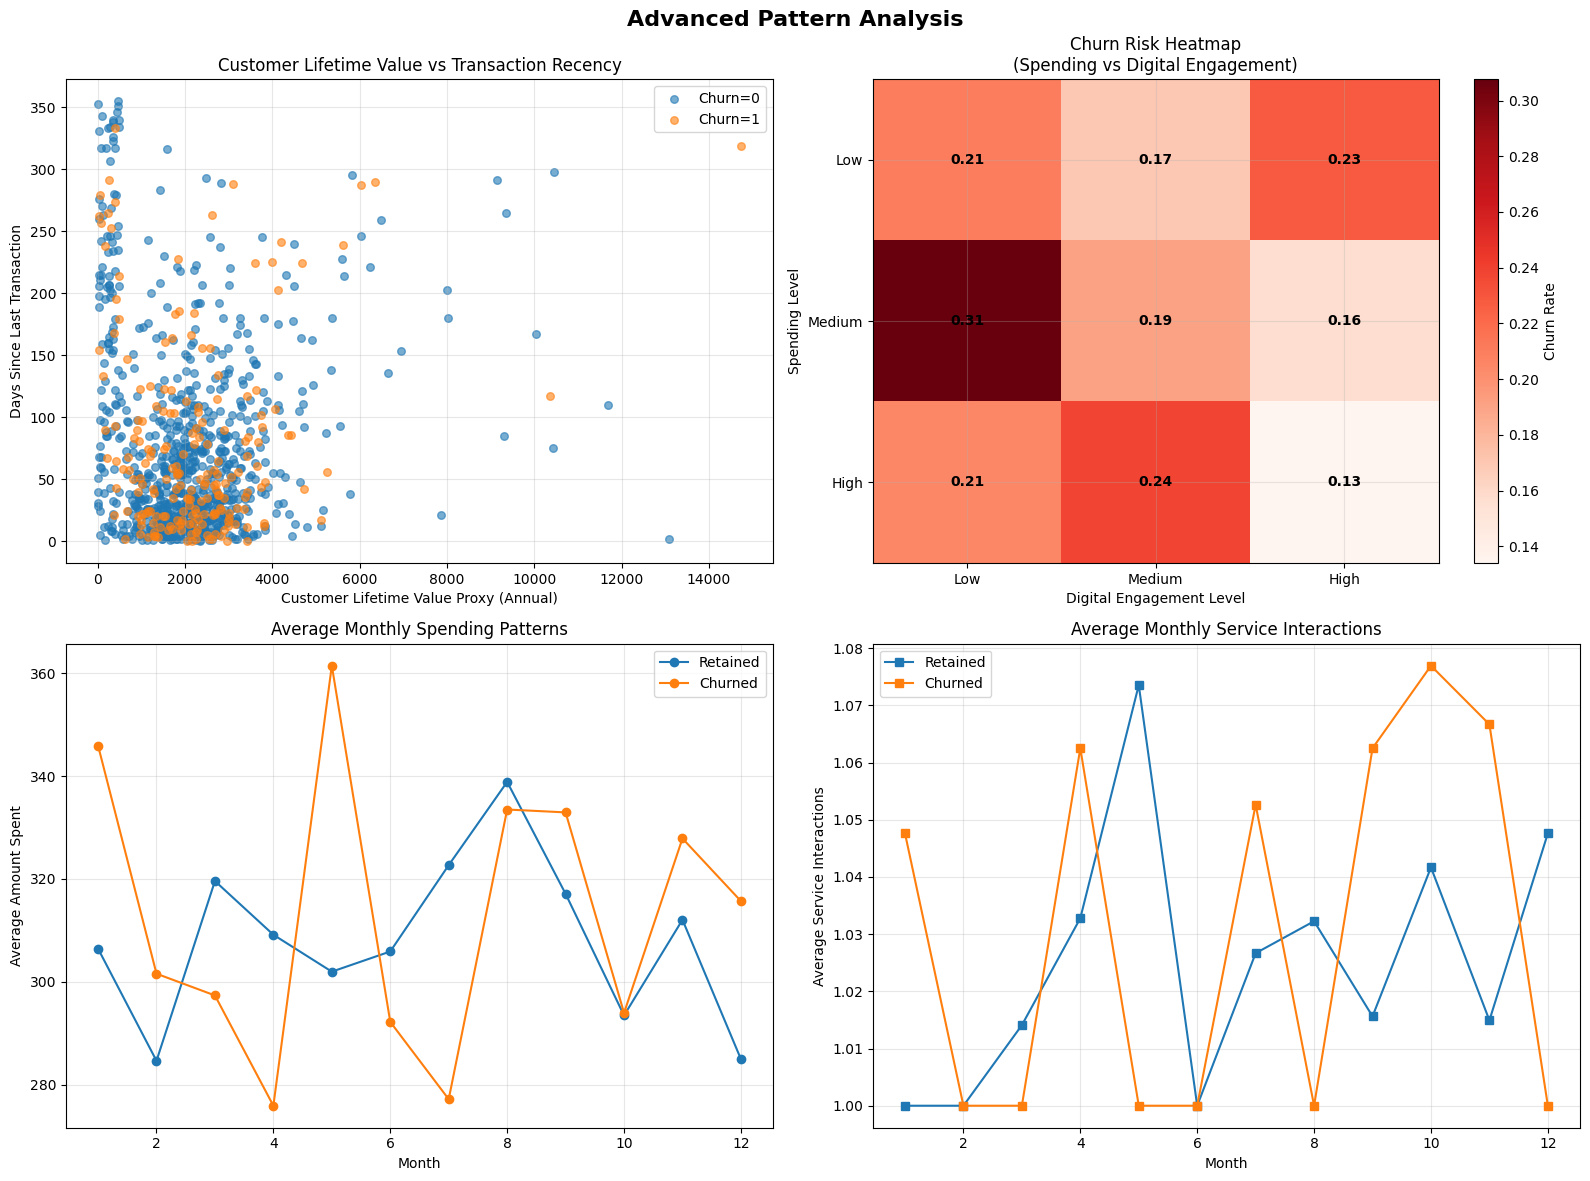

In [113]:
def create_advanced_visualizations():
    """Create advanced visualizations for deeper insights"""
    
    # Convert date columns to datetime format
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
    service_df['InteractionDate'] = pd.to_datetime(service_df['InteractionDate'])
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Advanced Pattern Analysis', fontsize=16, fontweight='bold')
    
    # 1. Customer Lifetime Value vs Churn Risk
    ax1 = axes[0, 0]
    
    # Create CLV proxy (Total_Spent / Customer_Tenure_Days * 365)
    master_df['CLV_Proxy'] = np.where(
        master_df['Customer_Tenure_Days'] > 0,
        master_df['Total_Spent'] / master_df['Customer_Tenure_Days'] * 365,
        master_df['Total_Spent']
    )
    
    # Remove extreme outliers for visualization
    clv_99th = master_df['CLV_Proxy'].quantile(0.99)
    clv_data = master_df[master_df['CLV_Proxy'] <= clv_99th]
    
    for churn_status in [0, 1]:
        subset = clv_data[clv_data['ChurnStatus'] == churn_status]
        ax1.scatter(subset['CLV_Proxy'], subset['Days_Since_Last_Transaction'], 
                    alpha=0.6, label=f'Churn={churn_status}', s=30)
    
    ax1.set_title('Customer Lifetime Value vs Transaction Recency')
    ax1.set_xlabel('Customer Lifetime Value Proxy (Annual)')
    ax1.set_ylabel('Days Since Last Transaction')
    ax1.legend()
    
    # Multi-dimensional churn risk heatmap
    ax2 = axes[0, 1]
    # Create risk segments based on key metrics
    spending_bins = pd.qcut(master_df['Total_Spent'], q=3, labels=['Low', 'Medium', 'High'])
    engagement_bins = pd.qcut(master_df['LoginFrequency'], q=3, labels=['Low', 'Medium', 'High'])
    
    # Create cross-tabulation
    risk_matrix = pd.crosstab(spending_bins, engagement_bins, master_df['ChurnStatus'], aggfunc='mean')
    
    im = ax2.imshow(risk_matrix.values, cmap='Reds', aspect='auto')
    ax2.set_title('Churn Risk Heatmap\n(Spending vs Digital Engagement)')
    ax2.set_xlabel('Digital Engagement Level')
    ax2.set_ylabel('Spending Level')
    ax2.set_xticks(range(3))
    ax2.set_xticklabels(['Low', 'Medium', 'High'])
    ax2.set_yticks(range(3))
    ax2.set_yticklabels(['Low', 'Medium', 'High'])
    
    # Add values to heatmap
    for i in range(3):
        for j in range(3):
            ax2.text(j, i, f'{risk_matrix.values[i, j]:.2f}', 
                    ha='center', va='center', fontweight='bold',
                    color='white' if risk_matrix.values[i, j] > 0.5 else 'black')
    
    plt.colorbar(im, ax=ax2, label='Churn Rate')
    
    # Time-based transaction patterns
    ax3 = axes[1, 0]
    
    # Analyze transaction patterns by month (if we have date data)
    transactions_df['Month'] = transactions_df['TransactionDate'].dt.month
    monthly_patterns = transactions_df.groupby(['CustomerID', 'Month']).agg({
        'AmountSpent': 'sum'
    }).reset_index()
    
    # Merge with churn status
    monthly_patterns = monthly_patterns.merge(churn_df, on='CustomerID')
    
    # Calculate average monthly spending by churn status
    monthly_churn_patterns = monthly_patterns.groupby(['Month', 'ChurnStatus'])['AmountSpent'].mean().unstack()
    
    if monthly_churn_patterns.shape[1] == 2:  # If we have both churned and retained customers
        monthly_churn_patterns.plot(kind='line', ax=ax3, marker='o')
        ax3.set_title('Average Monthly Spending Patterns')
        ax3.set_xlabel('Month')
        ax3.set_ylabel('Average Amount Spent')
        ax3.legend(['Retained', 'Churned'])
        ax3.grid(True, alpha=0.3)
    
    # Service interaction timeline analysis
    ax4 = axes[1, 1]
    
    # Analyze service interactions over time
    service_df['Month'] = service_df['InteractionDate'].dt.month
    service_monthly = service_df.groupby(['CustomerID', 'Month']).size().reset_index(name='Interactions')
    service_monthly = service_monthly.merge(churn_df, on='CustomerID')
    
    service_patterns = service_monthly.groupby(['Month', 'ChurnStatus'])['Interactions'].mean().unstack()
    
    if service_patterns.shape[1] == 2:
        service_patterns.plot(kind='line', ax=ax4, marker='s')
        ax4.set_title('Average Monthly Service Interactions')
        ax4.set_xlabel('Month')
        ax4.set_ylabel('Average Service Interactions')
        ax4.legend(['Retained', 'Churned'])
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

create_advanced_visualizations()

### Key Insights Summary

In [104]:
   def summarize_key_insights():
    """Summarise the most important findings from EDA"""
        
    print("\nTop Predicitive Features (Based on Correlation Analysis):")
        
    # Get top correlations with churn
    churn_correlations = correlation_matrix['ChurnStatus'].abs().sort_values(ascending=False)
    churn_correlations = churn_correlations[churn_correlations.index != 'ChurnStatus']
        
    for i, (feature, corr) in enumerate(churn_correlations.head(5).items(), 1):
        actual_corr = correlation_matrix['ChurnStatus'][feature]
        direction = "increases" if actual_corr > 0 else "decreases"
        print(f"  {i}. {feature}: {abs(actual_corr):.3f} correlation")
        print(f"     → As {feature} {direction}, churn probability increases")
        
    print(f"\nDemographic Insights:")
        
    # Age insights
    age_churn = master_df.groupby(pd.cut(master_df['Age'], bins=5))['ChurnStatus'].mean()
    highest_churn_age = age_churn.idxmax()
    print(f"  • Highest churn age group: {highest_churn_age} ({age_churn.max():.1%} churn rate)")
        
    # Income insights
    income_churn = master_df.groupby('IncomeLevel')['ChurnStatus'].mean()
    highest_churn_income = income_churn.idxmax()
    print(f"  • Highest churn income level: {highest_churn_income} ({income_churn.max():.1%} churn rate)")
        
    # Gender insights
    gender_churn = master_df.groupby('Gender')['ChurnStatus'].mean()
    print(f"  • Gender churn rates: " + ", ".join([f"{g}: {rate:.1%}" for g, rate in gender_churn.items()]))
        
    print(f"\nTransaction Behaviour Insights:")
        
    # Spending insights
    retained_avg_spend = master_df[master_df['ChurnStatus'] == 0]['Total_Spent'].mean()
    churned_avg_spend = master_df[master_df['ChurnStatus'] == 1]['Total_Spent'].mean()
    spend_difference = churned_avg_spend - retained_avg_spend
        
    print(f"  • Average spending - Retained: ${retained_avg_spend:.2f}, Churned: ${churned_avg_spend:.2f}")
    print(f"  • Spending difference: ${spend_difference:.2f} ({'higher' if spend_difference > 0 else 'lower'} for churned customers)")
        
    # Transaction frequency insights
    retained_freq = master_df[master_df['ChurnStatus'] == 0]['Transaction_Frequency'].mean()
    churned_freq = master_df[master_df['ChurnStatus'] == 1]['Transaction_Frequency'].mean()
        
    print(f"  • Transaction frequency - Retained: {retained_freq:.2f}/month, Churned: {churned_freq:.2f}/month")
        
    # Recency insights
    retained_recency = master_df[master_df['ChurnStatus'] == 0]['Days_Since_Last_Transaction'].mean()
    churned_recency = master_df[master_df['ChurnStatus'] == 1]['Days_Since_Last_Transaction'].mean()
        
    print(f"  • Days since last transaction - Retained: {retained_recency:.1f}, Churned: {churned_recency:.1f}")
        
    print(f"\nService Interaction Insights:")
        
    # Service interaction insights
    service_churn_rates = master_df.groupby('Service_Interactions')['ChurnStatus'].mean()
        
    print(f"  • Churn rates by service interaction count:")
    for interactions, churn_rate in service_churn_rates.items():
        customer_count = (master_df['Service_Interactions'] == interactions).sum()
        if customer_count >= 10:  # Only show statistically significant groups
            print(f"    {interactions} interactions: {churn_rate:.1%} (n={customer_count})")
        
    # Resolution rate insight
    service_customers = master_df[master_df['Service_Interactions'] > 0]
    if len(service_customers) > 0:
        retained_resolution = service_customers[service_customers['ChurnStatus'] == 0]['Resolution_Rate'].mean()
        churned_resolution = service_customers[service_customers['ChurnStatus'] == 1]['Resolution_Rate'].mean()
        print(f"  • Resolution rates - Retained: {retained_resolution:.1%}, Churned: {churned_resolution:.1%}")
        
    print(f"\nDigital Engagement Insights:")
        
    # Login frequency insights
    retained_logins = master_df[master_df['ChurnStatus'] == 0]['LoginFrequency'].mean()
    churned_logins = master_df[master_df['ChurnStatus'] == 1]['LoginFrequency'].mean()
        
    print(f"  • Login frequency - Retained: {retained_logins:.1f}, Churned: {churned_logins:.1f}")
        
    # Platform preference insights
    platform_churn = master_df.groupby('ServiceUsage')['ChurnStatus'].mean()
    print(f"  • Churn rates by platform:")
    for platform, churn_rate in platform_churn.items():
        customer_count = (master_df['ServiceUsage'] == platform).sum()
        print(f"    {platform}: {churn_rate:.1%} (n={customer_count})")
        
    print(f"\nAnomalies and red flags:")
        
    # High-value customers at risk
    high_value_at_risk = master_df[
        (master_df['Total_Spent'] > master_df['Total_Spent'].quantile(0.8)) &
        (master_df['Days_Since_Last_Transaction'] > master_df['Days_Since_Last_Transaction'].quantile(0.8))
    ]
        
    if len(high_value_at_risk) > 0:
        print(f"  • High-value customers with recent inactivity: {len(high_value_at_risk)} customers")
        print(f"    Average spending: ${high_value_at_risk['Total_Spent'].mean():.2f}")
        print(f"    Churn rate: {high_value_at_risk['ChurnStatus'].mean():.1%}")
        
    # Customers with service issues
    service_issues = master_df[
        (master_df['Service_Interactions'] >= 2) &
        (master_df['Resolution_Rate'] < 0.8)
    ]
        
    if len(service_issues) > 0:
        print(f"  • Customers with unresolved service issues: {len(service_issues)} customers")
        print(f"    Churn rate: {service_issues['ChurnStatus'].mean():.1%}")
        
    print(f"\nACTIONABLE RECOMMENDATIONS:")
    print(f"  1. Focus retention efforts on customers with {churn_correlations.index[0]}")
    print(f"  2. Improve service resolution rates (current average: {master_df['Resolution_Rate'].mean():.1%})")
    print(f"  3. Implement engagement campaigns for low-frequency users")
    print(f"  4. Monitor high-value customers for activity decreases")
    print(f"  5. Develop targeted offers for {highest_churn_income} income segment")
    
summarize_key_insights()


TOP PREDICTIVE FEATURES (Based on Correlation Analysis):
  1. LoginFrequency: 0.082 correlation
     → As LoginFrequency decreases, churn probability increases
  2. Service_Interactions: 0.062 correlation
     → As Service_Interactions decreases, churn probability increases
  3. Avg_Transaction: 0.045 correlation
     → As Avg_Transaction increases, churn probability increases
  4. Transaction_Frequency: 0.034 correlation
     → As Transaction_Frequency decreases, churn probability increases
  5. Age: 0.029 correlation
     → As Age increases, churn probability increases

DEMOGRAPHIC INSIGHTS:
  • Highest churn age group: (58.8, 69.0] (22.6% churn rate)
  • Highest churn income level: Low (22.2% churn rate)
  • Gender churn rates: F: 19.7%, M: 21.1%

TRANSACTION BEHAVIOR INSIGHTS:
  • Average spending - Retained: $1266.58, Churned: $1269.01
  • Spending difference: $2.43 (higher for churned customers)
  • Transaction frequency - Retained: 4.45/month, Churned: 3.66/month
  • Days since

### Setup and Data Loading for Data Cleaning

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Enhanced plotting settings
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

### Data Integration Function

In [106]:
def load_and_create_master_dataset():
    """Load data and create integrated dataset with engineered features"""
    
    try:
        # Load individual datasets
        demographics_df = pd.read_csv('Customer_Demographics.csv')
        transactions_df = pd.read_csv('Transaction_History.csv')
        service_df = pd.read_csv('Customer_Service.csv')
        online_activity_df = pd.read_csv('Online_Activity.csv')
        churn_df = pd.read_csv('Churn_Status.csv')
        
        # Convert date columns
        transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
        service_df['InteractionDate'] = pd.to_datetime(service_df['InteractionDate'])
        online_activity_df['LastLoginDate'] = pd.to_datetime(online_activity_df['LastLoginDate'])
        
        print("All datasets loaded successfully!")
        
        # Create integrated dataset (same as EDA)
        master_df = demographics_df.merge(churn_df, on='CustomerID', how='left')
        
        # Transaction features
        trans_features = transactions_df.groupby('CustomerID').agg({
            'AmountSpent': ['sum', 'mean', 'count', 'std'],
            'TransactionDate': ['min', 'max'],
            'ProductCategory': 'nunique'
        }).round(2)
        
        trans_features.columns = [
            'Total_Spent', 'Avg_Transaction', 'Transaction_Count', 'Spending_Volatility',
            'First_Transaction', 'Last_Transaction', 'Product_Categories'
        ]
        
        current_date = transactions_df['TransactionDate'].max()
        trans_features['Days_Since_Last_Transaction'] = (current_date - trans_features['Last_Transaction']).dt.days
        trans_features['Customer_Tenure_Days'] = (trans_features['Last_Transaction'] - trans_features['First_Transaction']).dt.days
        trans_features['Transaction_Frequency'] = trans_features['Transaction_Count'] / (trans_features['Customer_Tenure_Days'] + 1) * 30
        
        # Service features
        service_features = service_df.groupby('CustomerID').agg({
            'InteractionID': 'count',
            'InteractionDate': ['min', 'max'],
            'ResolutionStatus': lambda x: (x == 'Resolved').sum() / len(x)
        }).round(2)
        
        service_features.columns = ['Service_Interactions', 'First_Service_Date', 'Last_Service_Date', 'Resolution_Rate']
        service_features['Days_Since_Last_Service'] = (current_date - service_features['Last_Service_Date']).dt.days
        
        # Online activity features
        online_features = online_activity_df.copy()
        online_features['Days_Since_Last_Login'] = (current_date - online_features['LastLoginDate']).dt.days
        online_features = online_features.set_index('CustomerID')[['LoginFrequency', 'Days_Since_Last_Login', 'ServiceUsage']]
        
        # Merge all features
        master_df = master_df.merge(trans_features.reset_index(), on='CustomerID', how='left')
        master_df = master_df.merge(service_features.reset_index(), on='CustomerID', how='left')
        master_df = master_df.merge(online_features.reset_index(), on='CustomerID', how='left')
        
        print(f"Integrated dataset created: {master_df.shape}")
        
        return master_df, transactions_df, service_df
        
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None

# Load data
master_df, transactions_df, service_df = load_and_create_master_dataset()

All datasets loaded successfully!
Integrated dataset created: (1000, 24)


### Missing Value Analysis and Handling


Missing Value analysis:

Missing Value Summary:
                 Column  Missing_Count  Missing_Percentage      Data_Type
   Service_Interactions            332                33.2        float64
     First_Service_Date            332                33.2 datetime64[ns]
      Last_Service_Date            332                33.2 datetime64[ns]
        Resolution_Rate            332                33.2        float64
Days_Since_Last_Service            332                33.2        float64
    Spending_Volatility            117                11.7        float64


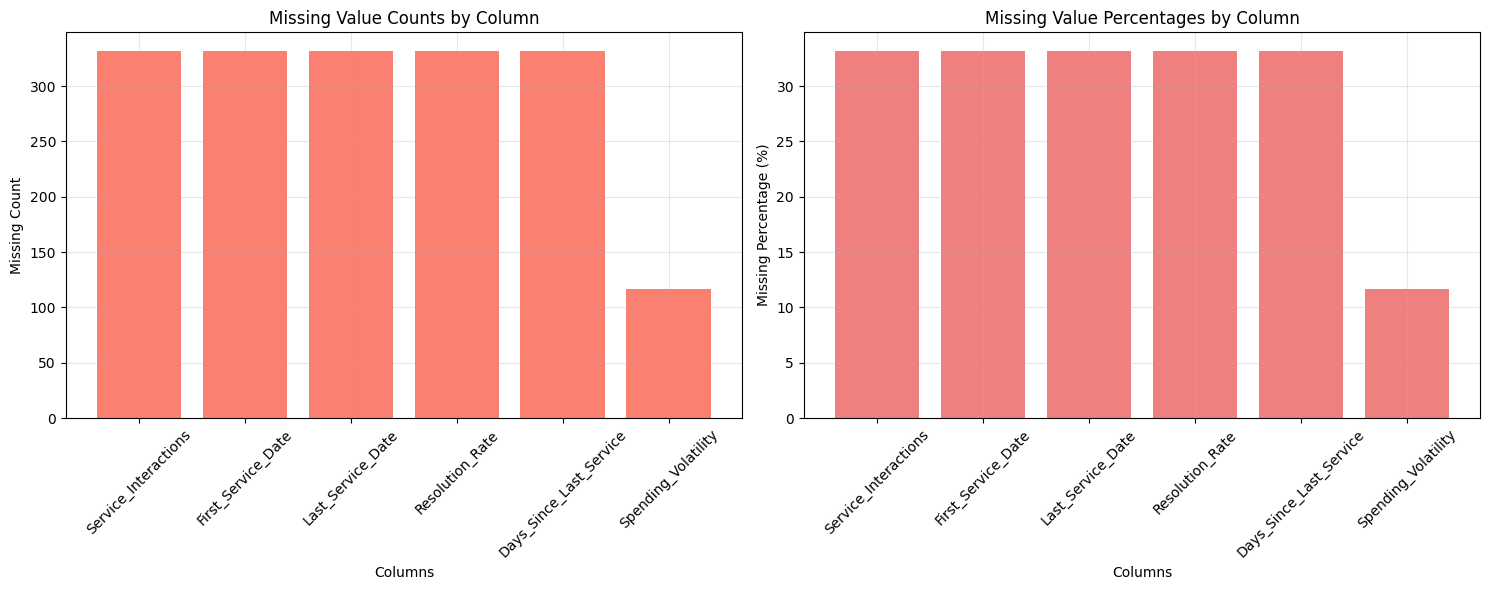


 MISSING VALUE TREATMENT:

Treatment Summary:
  • Service_Interactions: 332 missing → filled with 0 (no service interactions)
  • Resolution_Rate: 332 missing → filled with 0 (no service history)
  • Days_Since_Last_Service: 332 missing → filled with 725.0 (never contacted)
  • Spending_Volatility: 117 missing → filled with 0 (no volatility)

Missing value treatment complete!
   Remaining missing values: 664


In [107]:
if master_df is not None:
    
    
    def analyze_missing_values(df):
        """Comprehensive missing value analysis"""
        
        print("\nMissing Value analysis:")
        
        # Calculate missing value statistics
        missing_stats = pd.DataFrame({
            'Column': df.columns,
            'Missing_Count': df.isnull().sum(),
            'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
            'Data_Type': df.dtypes
        })
        
        missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
        
        if len(missing_stats) == 0:
            print("No missing values found in the dataset!")
            return missing_stats
        
        print(f"\nMissing Value Summary:")
        print(missing_stats.to_string(index=False))
        
        # Visualize missing values
        if len(missing_stats) > 0:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Missing value counts
            ax1.bar(missing_stats['Column'], missing_stats['Missing_Count'], color='salmon')
            ax1.set_title('Missing Value Counts by Column')
            ax1.set_xlabel('Columns')
            ax1.set_ylabel('Missing Count')
            ax1.tick_params(axis='x', rotation=45)
            
            # Missing value percentages
            ax2.bar(missing_stats['Column'], missing_stats['Missing_Percentage'], color='lightcoral')
            ax2.set_title('Missing Value Percentages by Column')
            ax2.set_xlabel('Columns')
            ax2.set_ylabel('Missing Percentage (%)')
            ax2.tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()
        
        return missing_stats
    
    def handle_missing_values(df):
        """Handle missing values using appropriate methods"""
        
        print("\n Missing value treatement:")
        
        df_cleaned = df.copy()
        treatment_log = []
        
        # Strategy 1: Service-related features (business logic imputation)
        service_cols = ['Service_Interactions', 'Resolution_Rate', 'Days_Since_Last_Service']
        
        for col in service_cols:
            if col in df_cleaned.columns:
                missing_count = df_cleaned[col].isnull().sum()
                if missing_count > 0:
                    if col == 'Service_Interactions':
                        df_cleaned[col] = df_cleaned[col].fillna(0)
                        treatment_log.append(f"{col}: {missing_count} missing → filled with 0 (no service interactions)")
                    elif col == 'Resolution_Rate':
                        df_cleaned[col] = df_cleaned[col].fillna(0)
                        treatment_log.append(f"{col}: {missing_count} missing → filled with 0 (no service history)")
                    elif col == 'Days_Since_Last_Service':
                        # Use a large number to indicate "never contacted service"
                        max_days = df_cleaned[col].max()
                        fill_value = max_days + 365 if not pd.isna(max_days) else 1000
                        df_cleaned[col] = df_cleaned[col].fillna(fill_value)
                        treatment_log.append(f"{col}: {missing_count} missing → filled with {fill_value} (never contacted)")
        
        # Transaction-related features (statistical imputation)
        transaction_cols = ['Total_Spent', 'Avg_Transaction', 'Transaction_Count', 'Spending_Volatility',
                           'Days_Since_Last_Transaction', 'Customer_Tenure_Days', 'Transaction_Frequency', 'Product_Categories']
        
        for col in transaction_cols:
            if col in df_cleaned.columns:
                missing_count = df_cleaned[col].isnull().sum()
                if missing_count > 0:
                    if col in ['Total_Spent', 'Avg_Transaction']:
                        # Use median for spending (robust to outliers)
                        fill_value = df_cleaned[col].median()
                        df_cleaned[col] = df_cleaned[col].fillna(fill_value)
                        treatment_log.append(f"{col}: {missing_count} missing → filled with median ({fill_value:.2f})")
                    elif col == 'Spending_Volatility':
                        # Zero volatility for customers with no/single transactions
                        df_cleaned[col] = df_cleaned[col].fillna(0)
                        treatment_log.append(f"{col}: {missing_count} missing → filled with 0 (no volatility)")
                    elif col in ['Transaction_Count', 'Product_Categories']:
                        df_cleaned[col] = df_cleaned[col].fillna(0)
                        treatment_log.append(f"{col}: {missing_count} missing → filled with 0 (no transactions)")
                    elif col == 'Transaction_Frequency':
                        df_cleaned[col] = df_cleaned[col].fillna(0)
                        treatment_log.append(f"{col}: {missing_count} missing → filled with 0 (no frequency)")
                    elif col in ['Days_Since_Last_Transaction', 'Customer_Tenure_Days']:
                        # Use a reasonable default for inactive customers
                        fill_value = df_cleaned[col].max() + 30 if not pd.isna(df_cleaned[col].max()) else 365
                        df_cleaned[col] = df_cleaned[col].fillna(fill_value)
                        treatment_log.append(f"{col}: {missing_count} missing → filled with {fill_value} (inactive)")
        
        # KNN Imputation for remaining numerical features
        remaining_numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
        remaining_missing = df_cleaned[remaining_numeric_cols].isnull().sum()
        remaining_missing = remaining_missing[remaining_missing > 0]
        
        if len(remaining_missing) > 0:
            print(f"\nApplying KNN imputation for remaining numerical features...")
            
            # Separate features for KNN imputation
            numeric_for_knn = df_cleaned[remaining_numeric_cols]
            
            # Apply KNN imputation
            knn_imputer = KNNImputer(n_neighbors=5)
            numeric_imputed = knn_imputer.fit_transform(numeric_for_knn)
            
            # Replace in dataframe
            df_cleaned[remaining_numeric_cols] = numeric_imputed
            
            for col in remaining_missing.index:
                treatment_log.append(f"{col}: {remaining_missing[col]} missing → KNN imputation (k=5)")
        
        # Mode imputation for categorical features
        categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
        
        for col in categorical_cols:
            if col not in ['CustomerID']:  # Skip ID columns
                missing_count = df_cleaned[col].isnull().sum()
                if missing_count > 0:
                    mode_value = df_cleaned[col].mode()[0] if len(df_cleaned[col].mode()) > 0 else 'Unknown'
                    df_cleaned[col] = df_cleaned[col].fillna(mode_value)
                    treatment_log.append(f"{col}: {missing_count} missing → filled with mode ({mode_value})")
        
        # Print treatment summary
        print("\nTreatment Summary:")
        for log in treatment_log:
            print(f"  • {log}")
        
        # Verify no missing values remain
        remaining_missing = df_cleaned.isnull().sum().sum()
        print(f"\nMissing value treatment complete!")
        print(f"   Remaining missing values: {remaining_missing}")
        
        return df_cleaned
    
    # Analyse and handle missing values
    missing_analysis = analyze_missing_values(master_df)
    master_df_cleaned = handle_missing_values(master_df)

### Outlier Detection and Handling


 Outlier Dectection using IQR method:
  Age:
    • Outliers: 0 (0.0%)
    • Valid range: -9.00 to 95.00
  Total_Spent:
    • Outliers: 0 (0.0%)
    • Valid range: -1121.14 to 3539.73
  Avg_Transaction:
    • Outliers: 38 (3.8%)
    • Valid range: 66.79 to 431.96
    • Churn rate - Outliers: 15.8%, Normal: 20.6%
  Transaction_Count:
    • Outliers: 0 (0.0%)
    • Valid range: -3.00 to 13.00
  Spending_Volatility:
    • Outliers: 8 (0.8%)
    • Valid range: -15.37 to 264.62
    • Churn rate - Outliers: 37.5%, Normal: 20.3%
  Product_Categories:
    • Outliers: 0 (0.0%)
    • Valid range: -1.00 to 7.00
  Days_Since_Last_Transaction:
    • Outliers: 66 (6.6%)
    • Valid range: -109.00 to 235.00
    • Churn rate - Outliers: 24.2%, Normal: 20.1%
  Customer_Tenure_Days:
    • Outliers: 0 (0.0%)
    • Valid range: -97.00 to 529.00
  Transaction_Frequency:
    • Outliers: 148 (14.8%)
    • Valid range: -0.08 to 1.71
    • Churn rate - Outliers: 17.6%, Normal: 20.9%
  Service_Interactions:
   

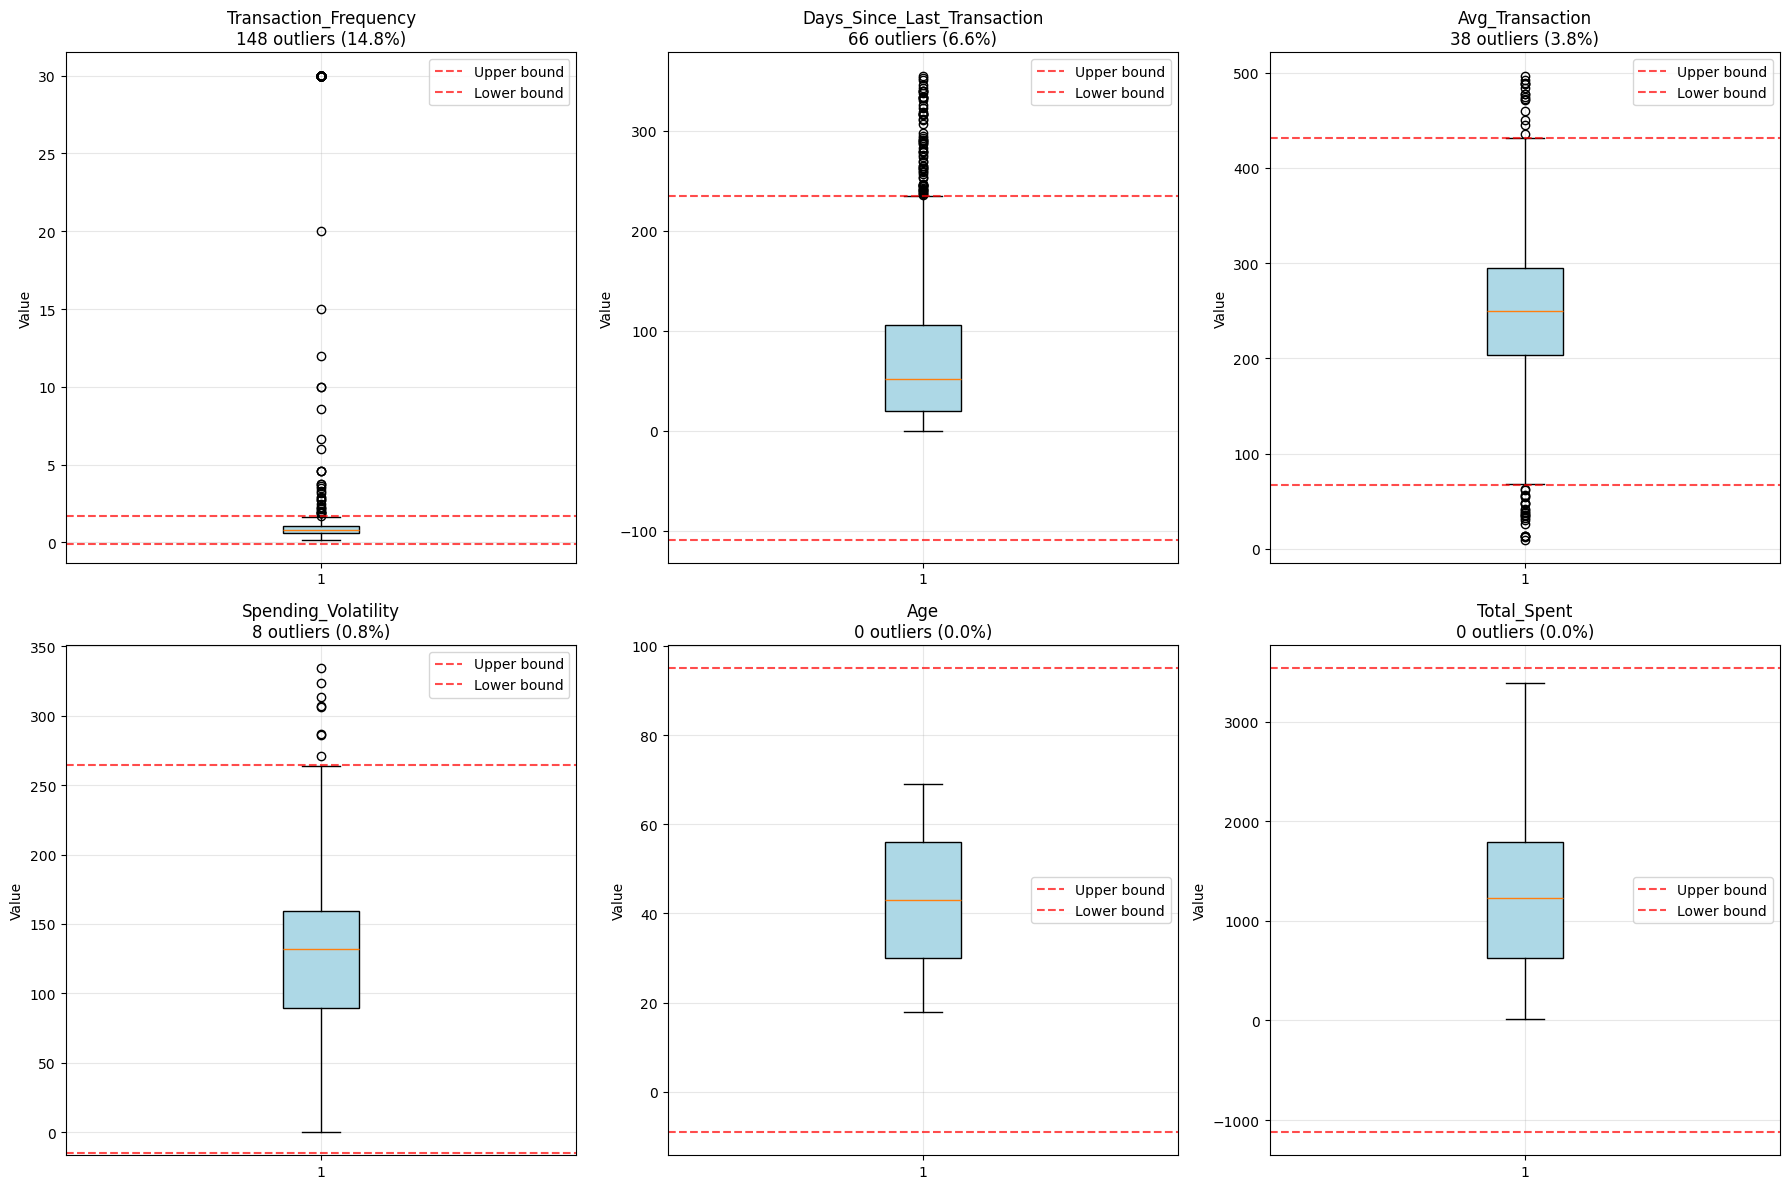


Outlier Treatment using cap strategy:

Outlier Treatment Summary:
  • Avg_Transaction: Kept outliers (potential VIP customers)
  • Spending_Volatility: Kept outliers (meaningful volatility patterns)
  • Days_Since_Last_Transaction: Kept outliers (meaningful for churn prediction)
  • Transaction_Frequency: Capped 10 outliers to 1st-99th percentile range


In [108]:
def detect_outliers(df, method='iqr'):
    """Detect outliers using multiple methods"""
        
    print(f"\n Outlier Dectection using {method.upper()} method:")
        
    # Select numerical columns for outlier detection
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    exclude_cols = ['CustomerID', 'ChurnStatus']  # Don't treat these as having outliers
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
        
    outlier_summary = {}
        
    for col in numeric_cols:
        if method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            
        elif method == 'zscore':
            z_scores = np.abs(zscore(df[col]))
            outliers = df[z_scores > 3]
            lower_bound = df[col].mean() - 3 * df[col].std()
            upper_bound = df[col].mean() + 3 * df[col].std()
            
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
            
        outlier_summary[col] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_indices': outliers.index.tolist()
        }
            
        print(f"  {col}:")
        print(f"    • Outliers: {outlier_count} ({outlier_percentage:.1f}%)")
        print(f"    • Valid range: {lower_bound:.2f} to {upper_bound:.2f}")
            
        if outlier_count > 0:
            # Analyse churn rate in outliers vs normal
            outlier_churn_rate = outliers['ChurnStatus'].mean() if 'ChurnStatus' in df.columns else 0
            normal_data = df[~df.index.isin(outliers.index)]
            normal_churn_rate = normal_data['ChurnStatus'].mean() if 'ChurnStatus' in df.columns else 0
            print(f"    • Churn rate - Outliers: {outlier_churn_rate:.1%}, Normal: {normal_churn_rate:.1%}")
        
    return outlier_summary
    
def visualize_outliers(df, outlier_summary):
    """Visualise outliers for key features"""
    
        
    # Select top features with most outliers
    sorted_features = sorted(outlier_summary.items(), key=lambda x: x[1]['count'], reverse=True)
    top_features = [item[0] for item in sorted_features[:6]]
        
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
        
    for i, feature in enumerate(top_features):
        if i < 6:
            ax = axes[i]
                
            # Box plot
            bp = ax.boxplot(df[feature], patch_artist=True)
            bp['boxes'][0].set_facecolor('lightblue')
                
            # Mark outlier boundaries
            bounds = outlier_summary[feature]
            ax.axhline(y=bounds['upper_bound'], color='red', linestyle='--', alpha=0.7, label='Upper bound')
            ax.axhline(y=bounds['lower_bound'], color='red', linestyle='--', alpha=0.7, label='Lower bound')
                
            ax.set_title(f'{feature}\n{bounds["count"]} outliers ({bounds["percentage"]:.1f}%)')
            ax.set_ylabel('Value')
            ax.legend()
        
    plt.tight_layout()
    plt.show()
    
def handle_outliers(df, outlier_summary, strategy='cap'):
    """Handle outliers using specified strategy"""
        
    print(f"\nOutlier Treatment using {strategy} strategy:")
        
    df_processed = df.copy()
    treatment_log = []
        
    for feature, outlier_info in outlier_summary.items():
        if outlier_info['count'] > 0:
            outlier_percentage = outlier_info['percentage']
                
            # Decision logic based on feature type and outlier percentage
            if feature in ['Days_Since_Last_Transaction', 'Days_Since_Last_Login', 'Days_Since_Last_Service']:
                # For "days since" features, high values are meaningful (long inactivity)
                if outlier_percentage > 10:
                    # Cap at 95th percentile if too many outliers
                    cap_value = df_processed[feature].quantile(0.95)
                    original_outliers = (df_processed[feature] > cap_value).sum()
                    df_processed[feature] = df_processed[feature].clip(upper=cap_value)
                    treatment_log.append(f"{feature}: Capped {original_outliers} values at 95th percentile ({cap_value:.1f})")
                else:
                    treatment_log.append(f"{feature}: Kept outliers (meaningful for churn prediction)")
                
            elif feature in ['Total_Spent', 'Avg_Transaction']:
                # For spending features, extreme values might be VIP customers
                if outlier_percentage > 5:
                    # Use log transformation to reduce impact
                    df_processed[f'{feature}_log'] = np.log1p(df_processed[feature])
                    treatment_log.append(f"{feature}: Created log-transformed version for {outlier_info['count']} outliers")
                else:
                    treatment_log.append(f"{feature}: Kept outliers (potential VIP customers)")
                
            elif feature in ['Transaction_Count', 'Service_Interactions']:
                # For count features, high values are business-relevant
                treatment_log.append(f"{feature}: Kept outliers (high engagement customers)")
                
            elif feature == 'Spending_Volatility':
                # High volatility might indicate inconsistent behavior
                if outlier_percentage > 8:
                    cap_value = df_processed[feature].quantile(0.95)
                    original_outliers = (df_processed[feature] > cap_value).sum()
                    df_processed[feature] = df_processed[feature].clip(upper=cap_value)
                    treatment_log.append(f"{feature}: Capped {original_outliers} values at 95th percentile ({cap_value:.2f})")
                else:
                    treatment_log.append(f"{feature}: Kept outliers (meaningful volatility patterns)")
                
            elif feature in ['Age', 'LoginFrequency']:
                # For demographic/usage features, use IQR capping
                if outlier_percentage > 3:
                    lower_cap = outlier_info['lower_bound']
                    upper_cap = outlier_info['upper_bound']
                        
                    # Count how many will be capped
                    lower_outliers = (df_processed[feature] < lower_cap).sum()
                    upper_outliers = (df_processed[feature] > upper_cap).sum()
                        
                    df_processed[feature] = df_processed[feature].clip(lower=lower_cap, upper=upper_cap)
                    treatment_log.append(f"{feature}: Capped {lower_outliers + upper_outliers} outliers to IQR bounds")
                else:
                    treatment_log.append(f"{feature}: Kept outliers (within acceptable range)")
                
            else:
                # Default: cap at 1st and 99th percentiles
                if outlier_percentage > 5:
                    lower_cap = df_processed[feature].quantile(0.01)
                    upper_cap = df_processed[feature].quantile(0.99)
                    capped_count = ((df_processed[feature] < lower_cap) | (df_processed[feature] > upper_cap)).sum()
                    df_processed[feature] = df_processed[feature].clip(lower=lower_cap, upper=upper_cap)
                    treatment_log.append(f"{feature}: Capped {capped_count} outliers to 1st-99th percentile range")
                else:
                    treatment_log.append(f"{feature}: Kept outliers (low percentage)")
        
    # Print treatment summary
    print("\nOutlier Treatment Summary:")
    for log in treatment_log:
        print(f"  • {log}")
        
    return df_processed
    
# Detect and handle outliers
outlier_summary = detect_outliers(master_df_cleaned, method='iqr')
visualize_outliers(master_df_cleaned, outlier_summary)
master_df_outliers_handled = handle_outliers(master_df_cleaned, outlier_summary)

### Feature Scaling and Normalization

In [109]:
def analyze_feature_distributions(df):
    """Analyse distributions to choose appropriate scaling method"""
        
    print("\nFeature Distribution Analysis:")
        
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    exclude_cols = ['CustomerID', 'ChurnStatus']
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
        
    distribution_analysis = {}
        
    for col in numeric_cols:
        data = df[col].dropna()
            
        # Calculate distribution statistics
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        range_val = data.max() - data.min()
        std_val = data.std()
        mean_val = data.mean()
            
        # Determine recommended scaling method
        if abs(skewness) > 1:
            if skewness > 0:
                recommended_scaling = "Log transformation + StandardScaler (right-skewed)"
            else:
                recommended_scaling = "Power transformation + StandardScaler (left-skewed)"
        elif range_val > 1000 or std_val > 100:
            recommended_scaling = "StandardScaler (large scale differences)"
        elif data.min() >= 0 and data.max() <= 1:
            recommended_scaling = "No scaling needed (already normalized)"
        else:
            recommended_scaling = "MinMaxScaler (moderate range)"
            
        distribution_analysis[col] = {
            'mean': mean_val,
            'std': std_val,
            'min': data.min(),
            'max': data.max(),
            'range': range_val,
            'skewness': skewness,
            'kurtosis': kurtosis,
            'recommended_scaling': recommended_scaling
        }
            
        print(f"  {col}:")
        print(f"    • Range: {data.min():.2f} to {data.max():.2f}")
        print(f"    • Mean ± Std: {mean_val:.2f} ± {std_val:.2f}")
        print(f"    • Skewness: {skewness:.2f}")
        print(f"    • Recommended: {recommended_scaling}")
        
    return distribution_analysis
    
def apply_feature_scaling(df, distribution_analysis):
    """Apply appropriate scaling methods based on distribution analysis"""
        
    df_scaled = df.copy()
    scaling_log = []
        
    # Separate features by scaling needs
    standard_scale_features = []
    minmax_scale_features = []
    log_transform_features = []
    no_scale_features = []
        
    for feature, analysis in distribution_analysis.items():
        if 'StandardScaler' in analysis['recommended_scaling']:
            if 'Log transformation' in analysis['recommended_scaling']:
                log_transform_features.append(feature)
            else:
                standard_scale_features.append(feature)
        elif 'MinMaxScaler' in analysis['recommended_scaling']:
            minmax_scale_features.append(feature)
        else:
            no_scale_features.append(feature)
        
    # Apply log transformation first (for skewed features)
    for feature in log_transform_features:
        if df_scaled[feature].min() >= 0:
            df_scaled[f'{feature}_log'] = np.log1p(df_scaled[feature])
            standard_scale_features.append(f'{feature}_log')
            scaling_log.append(f"{feature}: Applied log1p transformation → {feature}_log")
        else:
            # If negative values exist, use Box-Cox or add constant
            min_val = df_scaled[feature].min()
            df_scaled[f'{feature}_shifted'] = df_scaled[feature] - min_val + 1
            df_scaled[f'{feature}_log'] = np.log1p(df_scaled[f'{feature}_shifted'])
            standard_scale_features.append(f'{feature}_log')
            scaling_log.append(f"{feature}: Shifted and log-transformed → {feature}_log")
        
    # Apply StandardScaler
    if standard_scale_features:
        scaler_standard = StandardScaler()
        df_scaled[standard_scale_features] = scaler_standard.fit_transform(df_scaled[standard_scale_features])
        scaling_log.append(f"StandardScaler applied to: {', '.join(standard_scale_features)}")
        
    # Apply MinMaxScaler
    if minmax_scale_features:
        scaler_minmax = MinMaxScaler()
        df_scaled[minmax_scale_features] = scaler_minmax.fit_transform(df_scaled[minmax_scale_features])
        scaling_log.append(f"MinMaxScaler applied to: {', '.join(minmax_scale_features)}")
        
    # Log features that don't need scaling
    if no_scale_features:
        scaling_log.append(f"No scaling needed: {', '.join(no_scale_features)}")
        
    # Print scaling summary
    print("\nScaling Summary:")
    for log in scaling_log:
        print(f"  • {log}")
        
    return df_scaled, scaler_standard if standard_scale_features else None, scaler_minmax if minmax_scale_features else None
    
# Analyse distributions and apply scaling
distribution_analysis = analyze_feature_distributions(master_df_outliers_handled)
master_df_scaled, standard_scaler, minmax_scaler = apply_feature_scaling(master_df_outliers_handled, distribution_analysis)


Feature Distribution Analysis:
  Age:
    • Range: 18.00 to 69.00
    • Mean ± Std: 43.27 ± 15.24
    • Skewness: 0.01
    • Recommended: MinMaxScaler (moderate range)
  Total_Spent:
    • Range: 9.80 to 3386.04
    • Mean ± Std: 1267.07 ± 738.59
    • Skewness: 0.27
    • Recommended: StandardScaler (large scale differences)
  Avg_Transaction:
    • Range: 9.80 to 496.99
    • Mean ± Std: 248.81 ± 79.37
    • Skewness: -0.07
    • Recommended: MinMaxScaler (moderate range)
  Transaction_Count:
    • Range: 1.00 to 9.00
    • Mean ± Std: 5.05 ± 2.60
    • Skewness: -0.06
    • Recommended: MinMaxScaler (moderate range)
  Spending_Volatility:
    • Range: 0.00 to 334.31
    • Mean ± Std: 120.28 ± 62.80
    • Skewness: -0.39
    • Recommended: MinMaxScaler (moderate range)
  Product_Categories:
    • Range: 1.00 to 5.00
    • Mean ± Std: 3.10 ± 1.25
    • Skewness: -0.23
    • Recommended: MinMaxScaler (moderate range)
  Days_Since_Last_Transaction:
    • Range: 0.00 to 355.00
    • Mea

### Categorical Variable Encoding

In [110]:
def analyze_categorical_features(df):
    """Analyse categorical features to choose encoding strategy"""
        
    print("\nCatergorical Feature AnalysisC:")
        
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_cols = [col for col in categorical_cols if col != 'CustomerID']
        
    encoding_strategy = {}
        
    for col in categorical_cols:
        unique_values = df[col].nunique()
        value_counts = df[col].value_counts()
        most_common_pct = (value_counts.iloc[0] / len(df)) * 100 if len(value_counts) > 0 else 0
            
        print(f"  {col}:")
        print(f"    • Unique values: {unique_values}")
        print(f"    • Value distribution: {dict(value_counts.head())}")
        print(f"    • Most common: {most_common_pct:.1f}%")
            
        # Determine encoding strategy - FIXED LOGIC
        ordinal_keywords = ['high', 'medium', 'low', 'poor', 'good', 'excellent']
        has_ordinal_pattern = any(keyword in str(val).lower() for val in df[col].unique() for keyword in ordinal_keywords)
            
        if unique_values == 2:
            strategy = "Binary/Label Encoding"
        elif unique_values <= 5 and has_ordinal_pattern:
            strategy = "Ordinal Encoding"
        elif unique_values <= 5:
            strategy = "One-Hot Encoding"
        elif unique_values > 10:
            strategy = "Target Encoding (high cardinality)"
        else:
            strategy = "One-Hot Encoding"
            
        encoding_strategy[col] = {
            'unique_count': unique_values,
            'strategy': strategy,
            'values': df[col].unique().tolist()
        }
            
        print(f"    • Recommended: {strategy}")
        
    return encoding_strategy
    
def apply_categorical_encoding(df, encoding_strategy):
    """Apply appropriate encoding methods for categorical variables"""
    
        
    df_encoded = df.copy()
    encoding_log = []
        
    for feature, strategy_info in encoding_strategy.items():
        strategy = strategy_info['strategy']
            
        if strategy == "Binary/Label Encoding":
            # For binary variables
            if feature == 'Gender':
                df_encoded[f'{feature}_encoded'] = df_encoded[feature].map({'M': 1, 'F': 0})
                encoding_log.append(f"{feature}: Binary encoded (M=1, F=0)")
            else:
                # Generic binary encoding
                le = LabelEncoder()
                df_encoded[f'{feature}_encoded'] = le.fit_transform(df_encoded[feature])
                unique_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
                encoding_log.append(f"{feature}: Label encoded {unique_mapping}")
           
        elif strategy == "Ordinal Encoding":
            # For ordinal variables (like income levels)
            if feature == 'IncomeLevel':
                income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
                df_encoded[f'{feature}_encoded'] = df_encoded[feature].map(income_mapping)
                # Handle any unmapped values
                df_encoded[f'{feature}_encoded'] = df_encoded[f'{feature}_encoded'].fillna(0)
                encoding_log.append(f"{feature}: Ordinal encoded (Low=1, Medium=2, High=3)")
            elif feature == 'MaritalStatus':
                # Assume ordering based on relationship complexity
                unique_values = df_encoded[feature].unique()
                if 'Single' in unique_values and 'Married' in unique_values:
                    marital_mapping = {'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4}
                    # Only use mappings that exist in the data
                    actual_mapping = {k: v for k, v in marital_mapping.items() if k in unique_values}
                    df_encoded[f'{feature}_encoded'] = df_encoded[feature].map(actual_mapping)
                    encoding_log.append(f"{feature}: Ordinal encoded {actual_mapping}")
                else:
                    # Fallback to label encoding
                    le = LabelEncoder()
                    df_encoded[f'{feature}_encoded'] = le.fit_transform(df_encoded[feature])
                    encoding_log.append(f"{feature}: Label encoded (fallback)")
            else:
                # Generic ordinal encoding
                le = LabelEncoder()
                df_encoded[f'{feature}_encoded'] = le.fit_transform(df_encoded[feature])
                encoding_log.append(f"{feature}: Ordinal encoded")
           
        elif strategy == "One-Hot Encoding":
            # For nominal categorical variables
            dummies = pd.get_dummies(df_encoded[feature], prefix=f'{feature}')
            df_encoded = pd.concat([df_encoded, dummies], axis=1)
            encoding_log.append(f"{feature}: One-hot encoded → {list(dummies.columns)}")
           
        elif strategy == "Target Encoding (high cardinality)":
            # For high cardinality features, use target encoding
            if 'ChurnStatus' in df_encoded.columns:
                target_means = df_encoded.groupby(feature)['ChurnStatus'].mean()
                df_encoded[f'{feature}_target_encoded'] = df_encoded[feature].map(target_means)
                encoding_log.append(f"{feature}: Target encoded using churn rate")
            else:
                # Fallback to label encoding if no target
                le = LabelEncoder()
                df_encoded[f'{feature}_encoded'] = le.fit_transform(df_encoded[feature])
                encoding_log.append(f"{feature}: Label encoded (fallback)")
       
    # Print encoding summary
    print("\nEncoding Summary:")
    for log in encoding_log:
        print(f"  • {log}")
       
    return df_encoded
   
# Analyze and encode categorical features
encoding_strategy = analyze_categorical_features(master_df_scaled)
master_df_encoded = apply_categorical_encoding(master_df_scaled, encoding_strategy)


Catergorical Feature AnalysisC:
  Gender:
    • Unique values: 2
    • Value distribution: {'F': np.int64(513), 'M': np.int64(487)}
    • Most common: 51.3%
    • Recommended: Binary/Label Encoding
  MaritalStatus:
    • Unique values: 4
    • Value distribution: {'Widowed': np.int64(276), 'Married': np.int64(261), 'Divorced': np.int64(248), 'Single': np.int64(215)}
    • Most common: 27.6%
    • Recommended: One-Hot Encoding
  IncomeLevel:
    • Unique values: 3
    • Value distribution: {'High': np.int64(349), 'Medium': np.int64(326), 'Low': np.int64(325)}
    • Most common: 34.9%
    • Recommended: Ordinal Encoding
  ServiceUsage:
    • Unique values: 3
    • Value distribution: {'Online Banking': np.int64(349), 'Mobile App': np.int64(342), 'Website': np.int64(309)}
    • Most common: 34.9%
    • Recommended: One-Hot Encoding

APPLYING CATEGORICAL ENCODING:

Encoding Summary:
  • Gender: Binary encoded (M=1, F=0)
  • MaritalStatus: One-hot encoded → ['MaritalStatus_Divorced', 'Mari

### Final Dataset Preparation

In [114]:
def prepare_final_dataset(df):
    """Prepare final dataset with selected features"""
        
    # Remove original categorical columns (keep encoded versions)
    original_categorical = ['Gender', 'MaritalStatus', 'IncomeLevel', 'ServiceUsage']
        
    # Remove date columns that are not needed for modeling
    date_columns = ['First_Transaction', 'Last_Transaction', 'First_Service_Date', 'Last_Service_Date']
        
    # Remove intermediate columns created during processing
    intermediate_columns = [col for col in df.columns if '_shifted' in col]
        
    # Columns to remove
    columns_to_remove = original_categorical + date_columns + intermediate_columns
    columns_to_remove = [col for col in columns_to_remove if col in df.columns]
        
    df_final = df.drop(columns=columns_to_remove)
        
    print(f"  • Removed columns: {columns_to_remove}")
    print(f"  • Final dataset shape: {df_final.shape}")
        
    # Reorder columns (put target variable last)
    if 'ChurnStatus' in df_final.columns:
        cols = [col for col in df_final.columns if col != 'ChurnStatus']
        cols.append('ChurnStatus')
        df_final = df_final[cols]
        
    # Display final feature summary
    print(f"\nFinal summary:")
        
    feature_types = {
        'ID': [col for col in df_final.columns if 'ID' in col],
        'Demographic': [col for col in df_final.columns if any(x in col for x in ['Age', 'Gender', 'Marital', 'Income'])],
        'Transaction': [col for col in df_final.columns if any(x in col for x in ['Spent', 'Transaction', 'Product'])],
        'Service': [col for col in df_final.columns if any(x in col for x in ['Service', 'Resolution'])],
        'Digital': [col for col in df_final.columns if any(x in col for x in ['Login', 'Usage'])],
        'Target': ['ChurnStatus'] if 'ChurnStatus' in df_final.columns else []
    }
        
    for category, features in feature_types.items():
        if features:
            print(f"  {category} Features ({len(features)}): {features}")
        
    return df_final
    
def create_data_quality_report(df_original, df_final):
    """Create comprehensive data quality report"""
        
    print("\nDATA QUALITY REPORT:")
        
    print(f"\nDataset Transformation Summary:")
    print(f"  • Original shape: {df_original.shape}")
    print(f"  • Final shape: {df_final.shape}")
    print(f"  • Features added: {df_final.shape[1] - df_original.shape[1]}")
        
    print(f"\nData Quality Metrics:")
        
    # Missing values
    original_missing = df_original.isnull().sum().sum()
    final_missing = df_final.isnull().sum().sum()
    print(f"  • Missing values: {original_missing} → {final_missing}")
        
    # Data types
    numeric_features = len(df_final.select_dtypes(include=[np.number]).columns)
    categorical_features = len(df_final.select_dtypes(include=['object']).columns)
    print(f"  • Numeric features: {numeric_features}")
    print(f"  • Categorical features: {categorical_features}")
        
    # Feature ranges (for scaled features)
    numeric_cols = df_final.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in ['CustomerID', 'ChurnStatus']]
        
    if numeric_cols:
        print(f"\nFeature Scaling Verification:")
        for col in numeric_cols[:5]:  # Show first 5 features
            mean_val = df_final[col].mean()
            std_val = df_final[col].std()
            min_val = df_final[col].min()
            max_val = df_final[col].max()
            print(f"  • {col}: Range [{min_val:.3f}, {max_val:.3f}], Mean: {mean_val:.3f}, Std: {std_val:.3f}")
        
    return {
        'original_shape': df_original.shape,
        'final_shape': df_final.shape,
        'missing_values_removed': original_missing - final_missing,
        'numeric_features': numeric_features,
        'categorical_features': categorical_features
    }
    
# Prepare final dataset and create quality report
master_df_final = prepare_final_dataset(master_df_encoded)
quality_report = create_data_quality_report(master_df, master_df_final)

  • Removed columns: ['Gender', 'MaritalStatus', 'IncomeLevel', 'ServiceUsage', 'First_Transaction', 'Last_Transaction', 'First_Service_Date', 'Last_Service_Date']
  • Final dataset shape: (1000, 27)

Final summary:
  ID Features (1): ['CustomerID']
  Demographic Features (7): ['Age', 'Gender_encoded', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'IncomeLevel_encoded']
  Transaction Features (8): ['Total_Spent', 'Avg_Transaction', 'Transaction_Count', 'Product_Categories', 'Days_Since_Last_Transaction', 'Transaction_Frequency', 'Days_Since_Last_Transaction_log', 'Transaction_Frequency_log']
  Service Features (6): ['Service_Interactions', 'Resolution_Rate', 'Days_Since_Last_Service', 'ServiceUsage_Mobile App', 'ServiceUsage_Online Banking', 'ServiceUsage_Website']
  Digital Features (5): ['LoginFrequency', 'Days_Since_Last_Login', 'ServiceUsage_Mobile App', 'ServiceUsage_Online Banking', 'ServiceUsage_Website']
  Target Features (1

### Visualization and Export

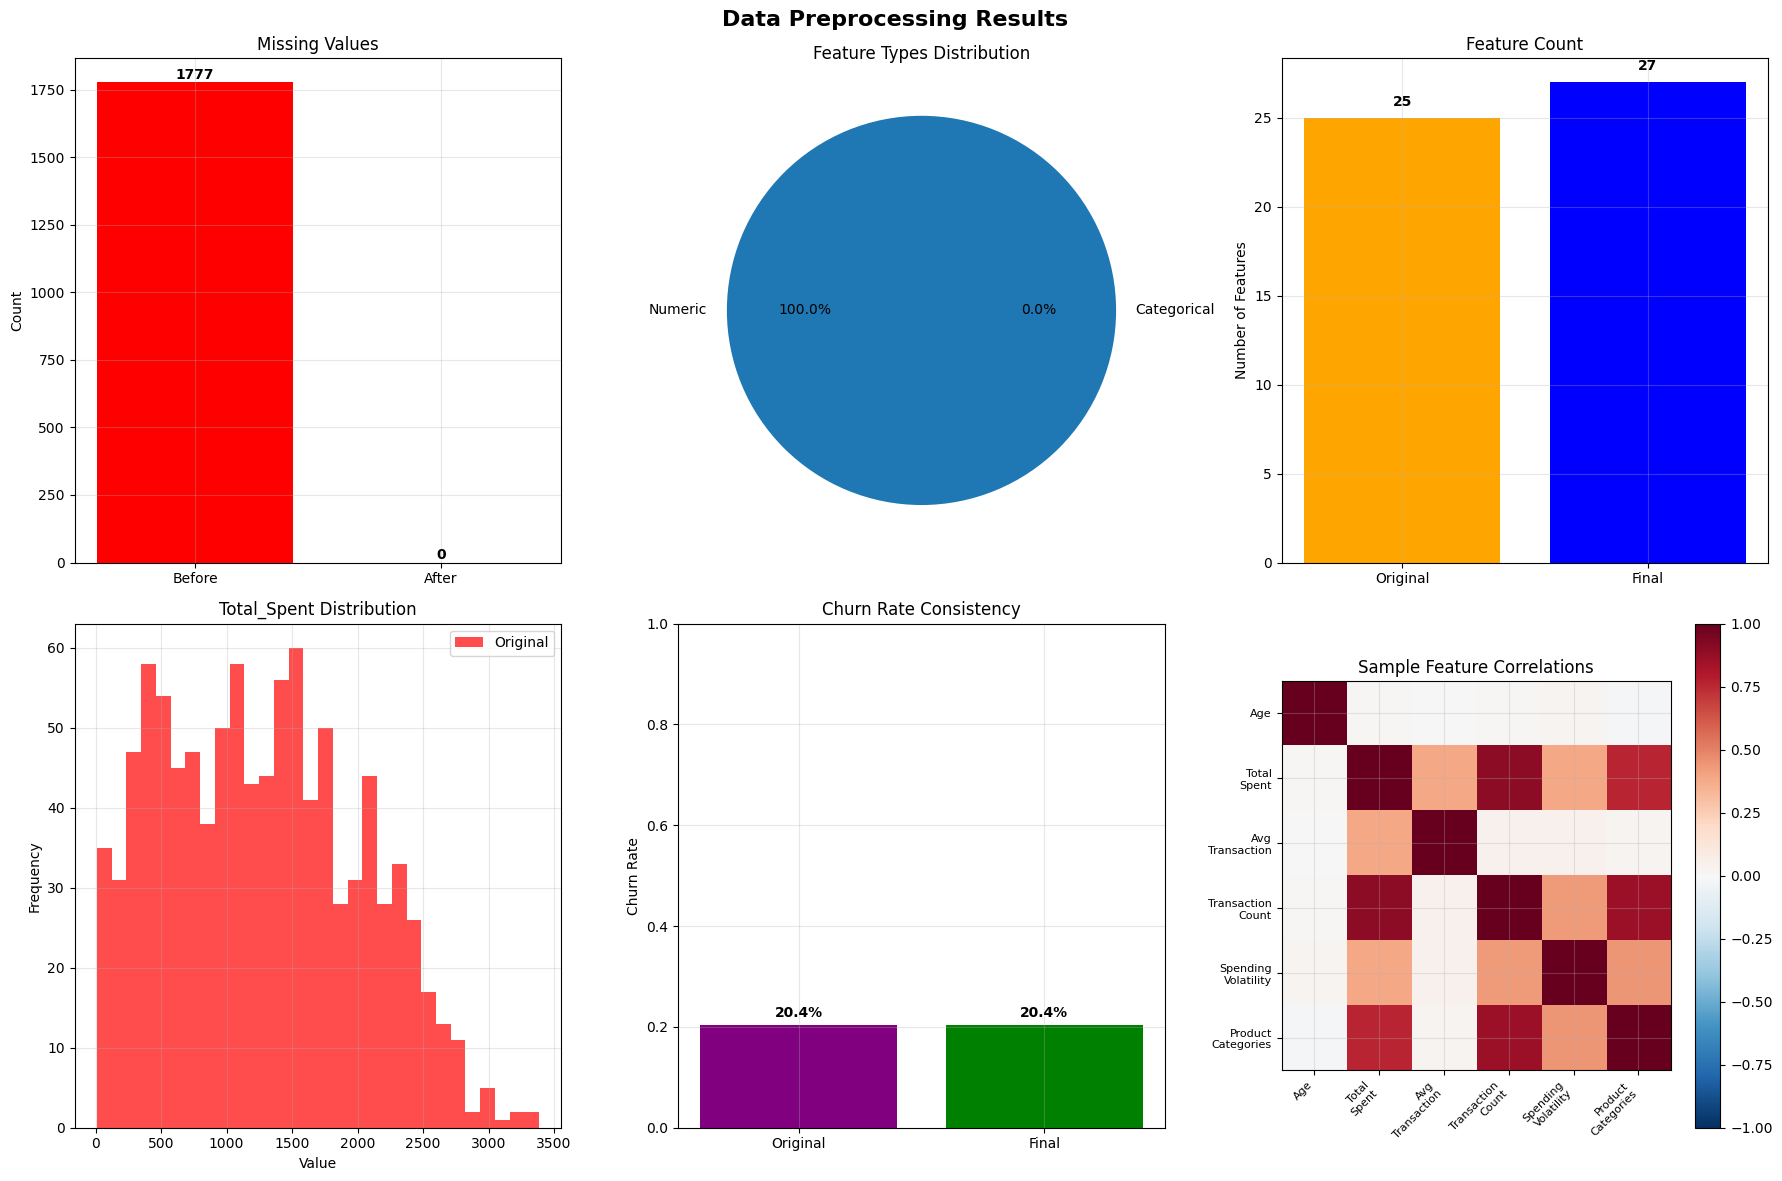

  • Processed dataset saved: customer_churn_processed.csv
  • Feature documentation saved: feature_documentation.txt


In [115]:
def visualize_preprocessing_results(df_original, df_final):
    """Visualize the results of preprocessing"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Data Preprocessing Results', fontsize=16, fontweight='bold')
    
    # Missing values before/after
    ax1 = axes[0, 0]
    missing_before = df_original.isnull().sum().sum()
    missing_after = df_final.isnull().sum().sum()
    
    ax1.bar(['Before', 'After'], [missing_before, missing_after], color=['red', 'green'])
    ax1.set_title('Missing Values')
    ax1.set_ylabel('Count')
    for i, v in enumerate([missing_before, missing_after]):
        ax1.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
    
    # Feature count by type
    ax2 = axes[0, 1]
    feature_counts = {
        'Numeric': len(df_final.select_dtypes(include=[np.number]).columns),
        'Categorical': len(df_final.select_dtypes(include=['object']).columns)
    }
    ax2.pie(feature_counts.values(), labels=feature_counts.keys(), autopct='%1.1f%%')
    ax2.set_title('Feature Types Distribution')
    
    # Dataset size comparison
    ax3 = axes[0, 2]
    sizes = [df_original.shape[1], df_final.shape[1]]
    ax3.bar(['Original', 'Final'], sizes, color=['orange', 'blue'])
    ax3.set_title('Feature Count')
    ax3.set_ylabel('Number of Features')
    for i, v in enumerate(sizes):
        ax3.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
    
    # Sample feature distributions (before/after scaling)
    ax4 = axes[1, 0]
    if 'Total_Spent' in df_original.columns:
        ax4.hist(df_original['Total_Spent'], bins=30, alpha=0.7, label='Original', color='red')
        ax4.set_title('Total_Spent Distribution')
        ax4.set_xlabel('Value')
        ax4.set_ylabel('Frequency')
        ax4.legend()
    
    # Churn rate consistency
    ax5 = axes[1, 1]
    if 'ChurnStatus' in df_original.columns and 'ChurnStatus' in df_final.columns:
        churn_original = df_original['ChurnStatus'].mean()
        churn_final = df_final['ChurnStatus'].mean()
        ax5.bar(['Original', 'Final'], [churn_original, churn_final], color=['purple', 'green'])
        ax5.set_title('Churn Rate Consistency')
        ax5.set_ylabel('Churn Rate')
        ax5.set_ylim(0, 1)
        for i, v in enumerate([churn_original, churn_final]):
            ax5.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')
    
    # Feature correlation sample
    ax6 = axes[1, 2]
    numeric_cols = df_final.select_dtypes(include=[np.number]).columns
    key_features = [col for col in numeric_cols if col not in ['CustomerID']][:6]
    
    if len(key_features) > 1:
        corr_matrix = df_final[key_features].corr()
        im = ax6.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
        ax6.set_title('Sample Feature Correlations')
        ax6.set_xticks(range(len(key_features)))
        ax6.set_yticks(range(len(key_features)))
        ax6.set_xticklabels([f.replace('_', '\n') for f in key_features], rotation=45, ha='right', fontsize=8)
        ax6.set_yticklabels([f.replace('_', '\n') for f in key_features], fontsize=8)
        plt.colorbar(im, ax=ax6)
    
    plt.tight_layout()
    plt.show()

def export_processed_data(df, quality_report):
    """Export processed data and create summary report"""
    
    # Save processed dataset
    output_filename = 'customer_churn_processed.csv'
    df.to_csv(output_filename, index=False)
    print(f"  • Processed dataset saved: {output_filename}")
    
    # Create feature documentation
    feature_doc = []
    
    for col in df.columns:
        if col == 'CustomerID':
            feature_doc.append(f"{col}: Unique customer identifier")
        elif col == 'ChurnStatus':
            feature_doc.append(f"{col}: Target variable (0=Retained, 1=Churned)")
        elif 'encoded' in col:
            feature_doc.append(f"{col}: Encoded categorical variable")
        elif 'log' in col:
            feature_doc.append(f"{col}: Log-transformed feature")
        elif any(x in col for x in ['ServiceUsage_', 'Gender_', 'MaritalStatus_', 'IncomeLevel_']):
            feature_doc.append(f"{col}: One-hot encoded categorical feature")
        else:
            feature_doc.append(f"{col}: Processed numerical feature")
    
    # Save feature documentation
    doc_filename = 'feature_documentation.txt'
    with open(doc_filename, 'w') as f:
        f.write("CUSTOMER CHURN DATASET - FEATURE DOCUMENTATION\n")
        f.write("="*50 + "\n\n")
        f.write(f"Dataset Shape: {df.shape}\n")
        f.write(f"Total Features: {df.shape[1]}\n")
        f.write(f"Total Records: {df.shape[0]}\n\n")
        f.write("FEATURE DESCRIPTIONS:\n")
        f.write("-"*20 + "\n")
        for doc in feature_doc:
            f.write(f"{doc}\n")
    
    print(f"  • Feature documentation saved: {doc_filename}")
    
    return output_filename, doc_filename

# Run the visualization and export functions
visualize_preprocessing_results(master_df, master_df_final)

# Export data and create final summary
output_files = export_processed_data(master_df_final, quality_report)
